In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotnine
from plotnine import *
from urllib.request import urlopen
import json
import folium
from folium import *
import geopandas as gpd
from io import StringIO

In [191]:
FullPoliceData = pd.ExcelFile('FullPoliceData.xlsx')

In [192]:
Incidents_DataFrame = pd.read_excel(FullPoliceData, 2, index_col=0, skiprows = 5)

In [193]:
Incidents_DataFrame

,Tactic,Total
Type of force,,
Restraint,Total Restraint,285562.0
Restraint,"Handcuffing, of which",218810.0
Restraint,Compliant handcuffing,106615.0
Restraint,Non-compliant handcuffing,77763.0
Restraint,Not stated,34432.0
Restraint,Limb / Body restraints,21646.0
Restraint,Ground restraint,45106.0
Unarmed skills,Total Unarmed skills,109655.0
Other equipment,Total Other equipment,22217.0


In [194]:
Incidents_DataFrame.drop(Incidents_DataFrame.tail(7).index,inplace=True)

In [ ]:
Incidents_DataFrame

In [196]:
Incidents_DataFrame.drop(Incidents_DataFrame.tail(2).index,inplace=True)

In [ ]:
Incidents_DataFrame

In [198]:
Incidents_DataFrame.dropna(inplace=True)

In [ ]:
Incidents_DataFrame

In [375]:
Incidents_DataFrame.bfill(inplace=True)

In [ ]:
Incidents_DataFrame

In [202]:
Incidents_DataFrame = Incidents_DataFrame.reset_index()

In [203]:
Incidents_DataFrame.ffill(inplace=True)

In [204]:
##Incidents_DataFrame.set_index('Type of force', inplace=True)

In [ ]:
Incidents_DataFrame

<Axes: xlabel='Type of force', ylabel='Total'>

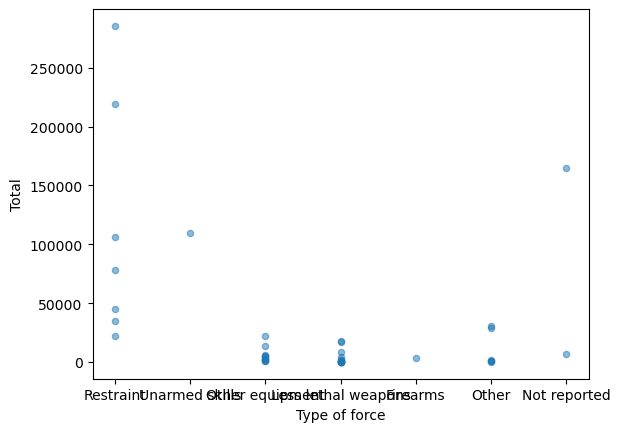

In [206]:
Incidents_DataFrame.plot.scatter(x="Type of force", y="Total", alpha=0.5)

In [ ]:
Incidents_DataFrame.set_index('Type of force')

In [ ]:
Incidents_DataFrame

<Axes: xlabel='Type of force', ylabel='Total'>

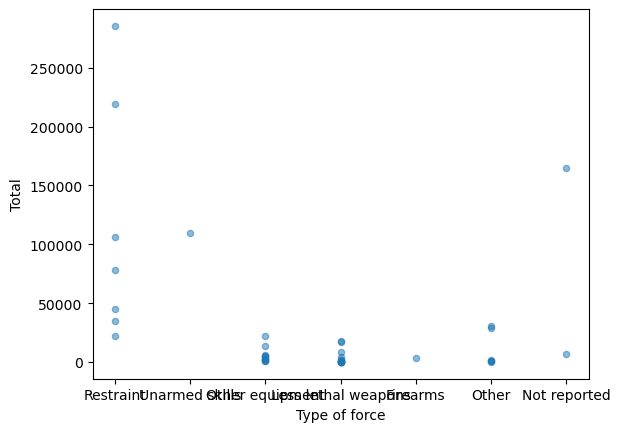

In [209]:
Incidents_DataFrame.plot.scatter(x="Type of force", y="Total", alpha=0.5)

In [210]:
#Incidents_DataFrame.groupby('Type of force')['Total'].plot(x = ['Type of force'], y = ['Total'], kind = 'bar', legend=True)

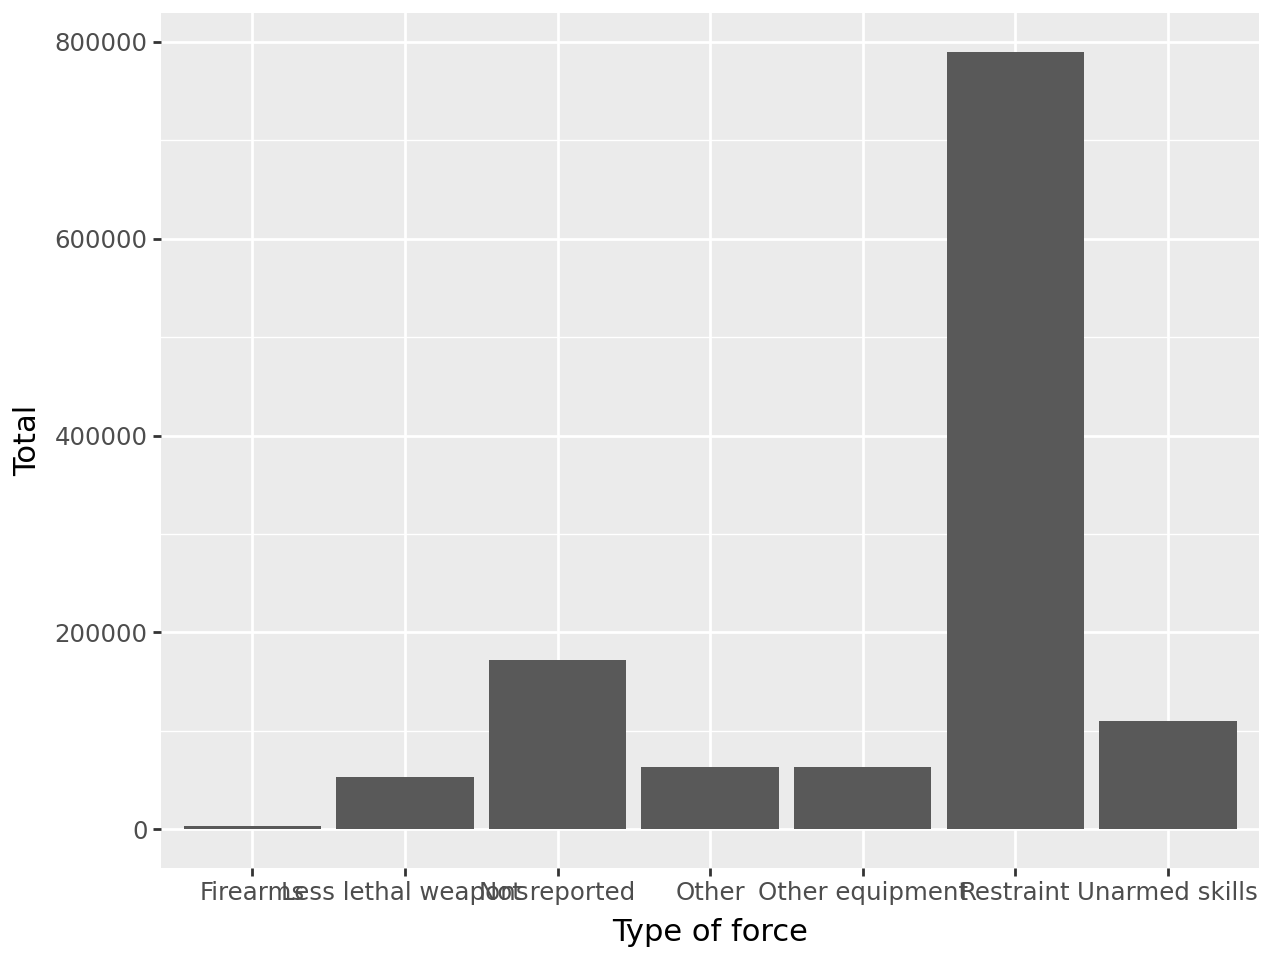

In [211]:
ggplot(Incidents_DataFrame)+ geom_bar(mapping = aes(x = 'Type of force', y = 'Total'), stat = "identity")

c:\Users\harve\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning:

stat_boxplot : Removed 1 rows containing non-finite values.



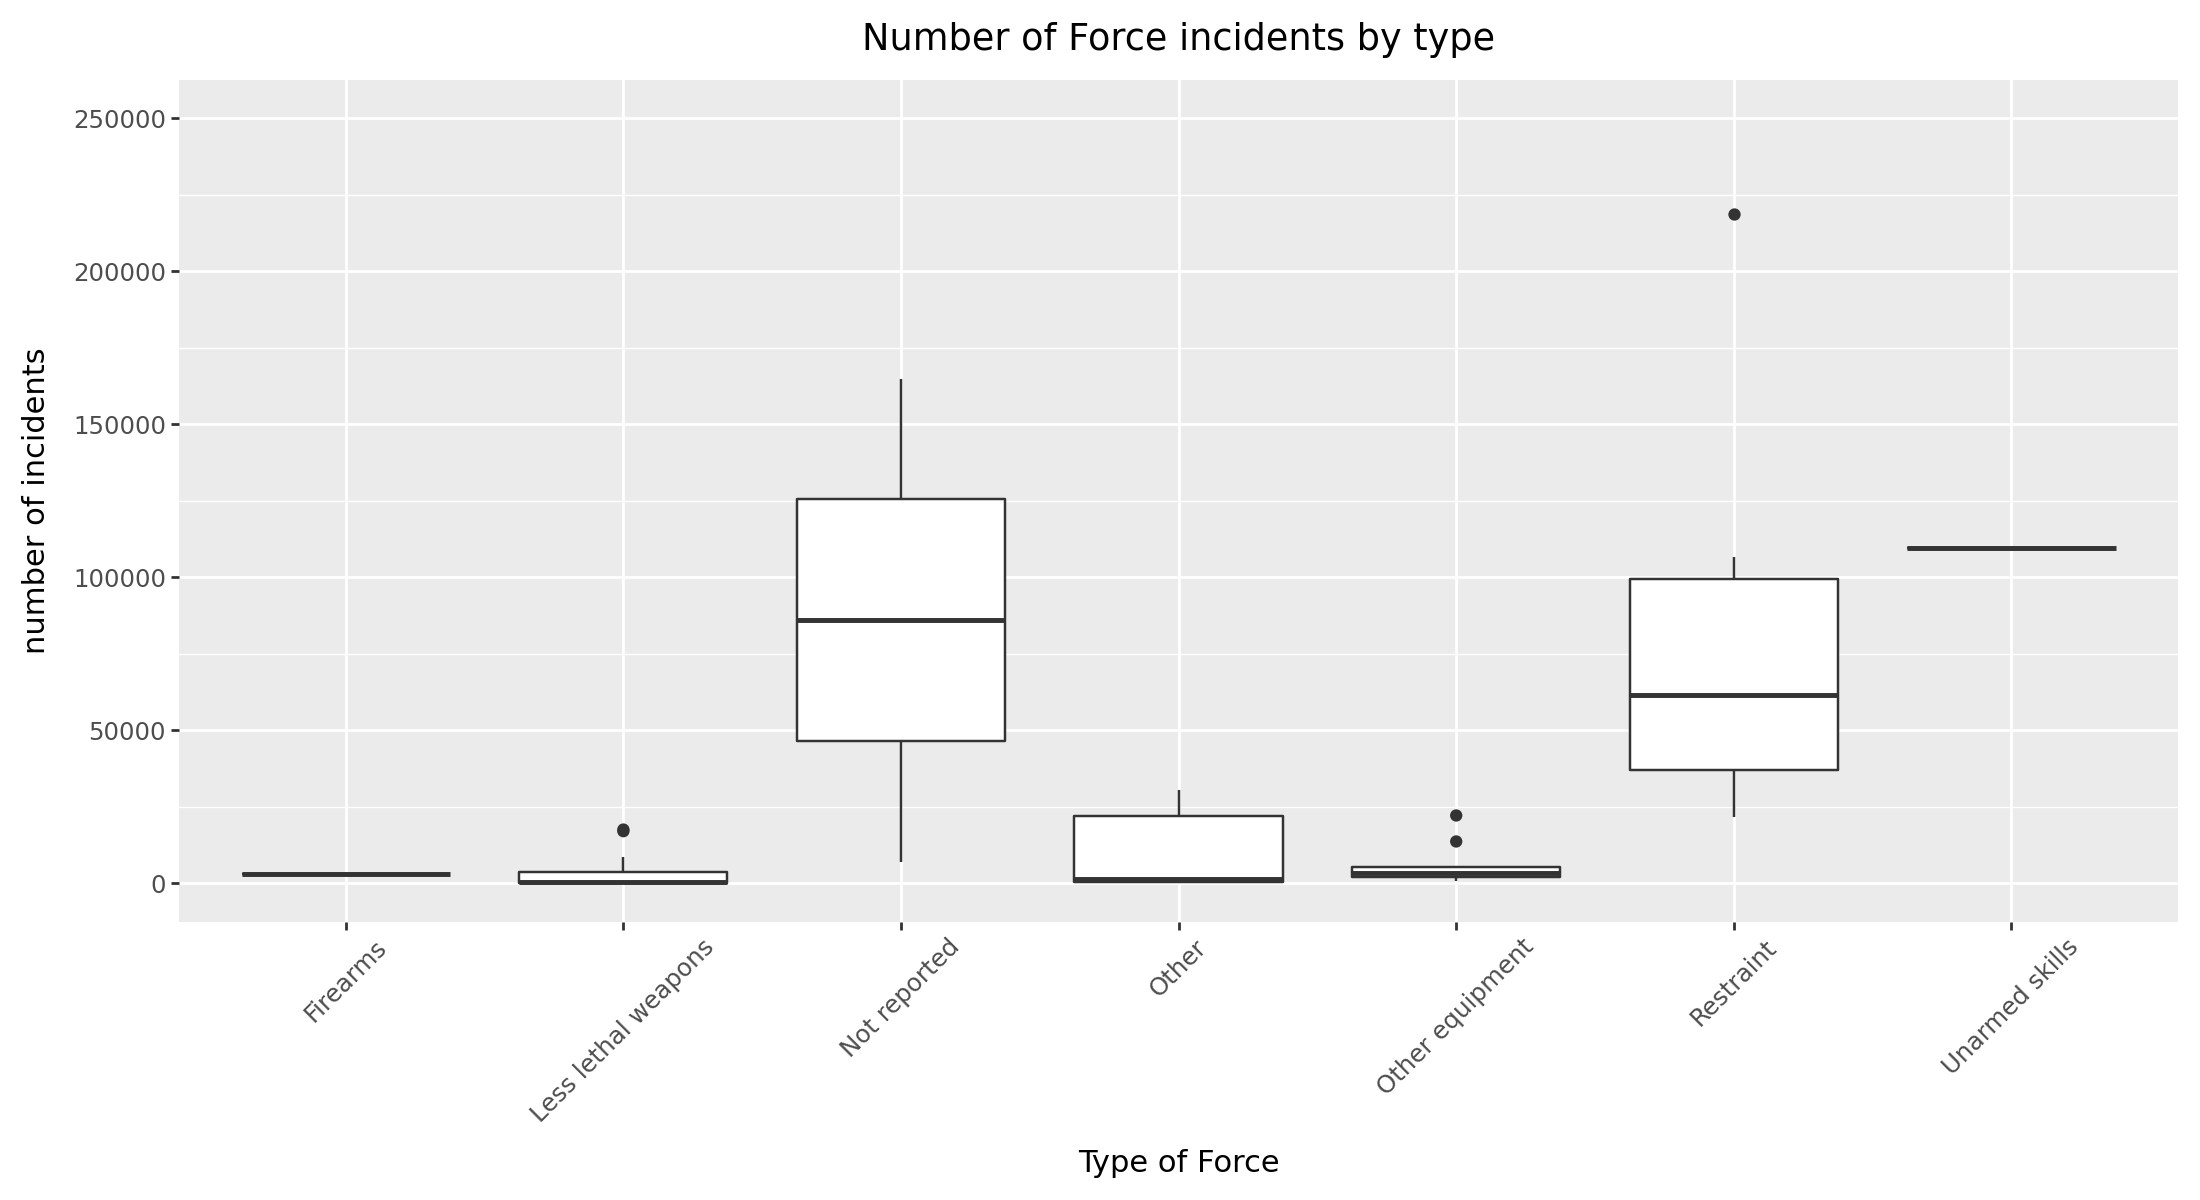

In [212]:
ggplot(data = Incidents_DataFrame, mapping = aes(x = 'Type of force', y = 'Total')) + geom_boxplot()+ labs(y ="number of incidents", x="Type of Force", title="Number of Force incidents by type") + scale_y_continuous(limits = (0,250000)) + theme(figure_size=(11, 6), axis_text_x=element_text(rotation=45))


In [213]:
forcesplit = [Incidents_DataFrame.loc[[i]] for i in Incidents_DataFrame.index] 

In [ ]:
print(forcesplit)

In [215]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Restraint'].index)

In [216]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Unarmed skills'].index)

In [217]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Other equipment'].index)

In [218]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Less lethal weapons'].index)

In [219]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Firearms'].index)

In [220]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Other'].index)

In [221]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Not reported'].index)

In [222]:
Incidents_DataFrame

,Type of force,Tactic,Total
1,Restraint,"Handcuffing, of which",218810.0
2,Restraint,Compliant handcuffing,106615.0
3,Restraint,Non-compliant handcuffing,77763.0
4,Restraint,Not stated,34432.0
5,Restraint,Limb / Body restraints,21646.0
6,Restraint,Ground restraint,45106.0
9,Other equipment,"Baton, of which",5026.0
10,Other equipment,Baton drawn,2756.0
11,Other equipment,Baton used,1377.0
12,Other equipment,Not stated,893.0


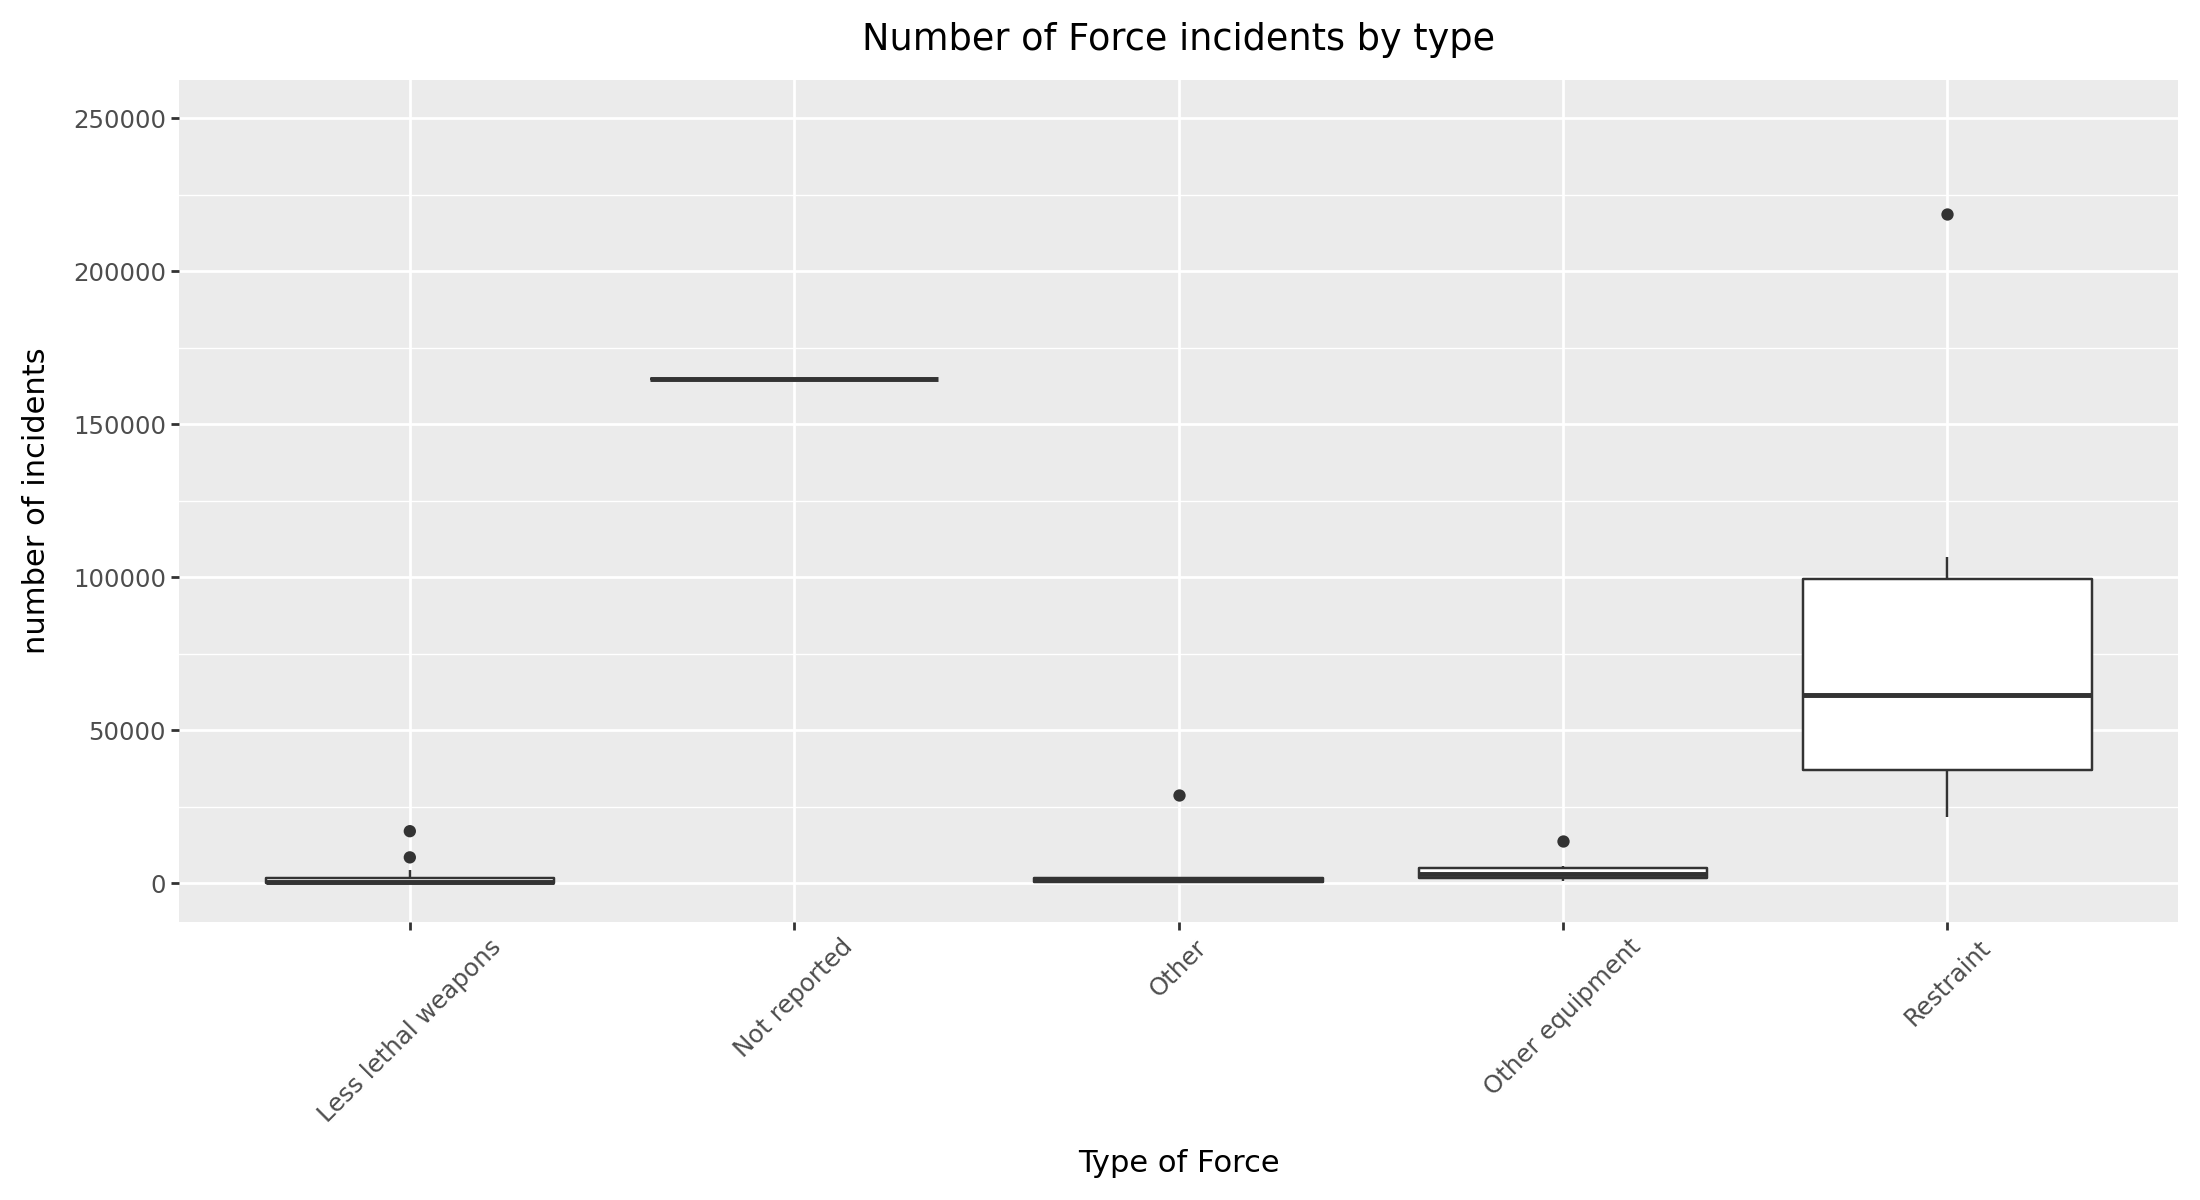

In [223]:
ggplot(data = Incidents_DataFrame, mapping = aes(x = 'Type of force', y = 'Total')) + geom_boxplot()+ labs(y ="number of incidents", x="Type of Force", title="Number of Force incidents by type") + scale_y_continuous(limits = (0,250000)) + theme(figure_size=(11, 6), axis_text_x=element_text(rotation=45))


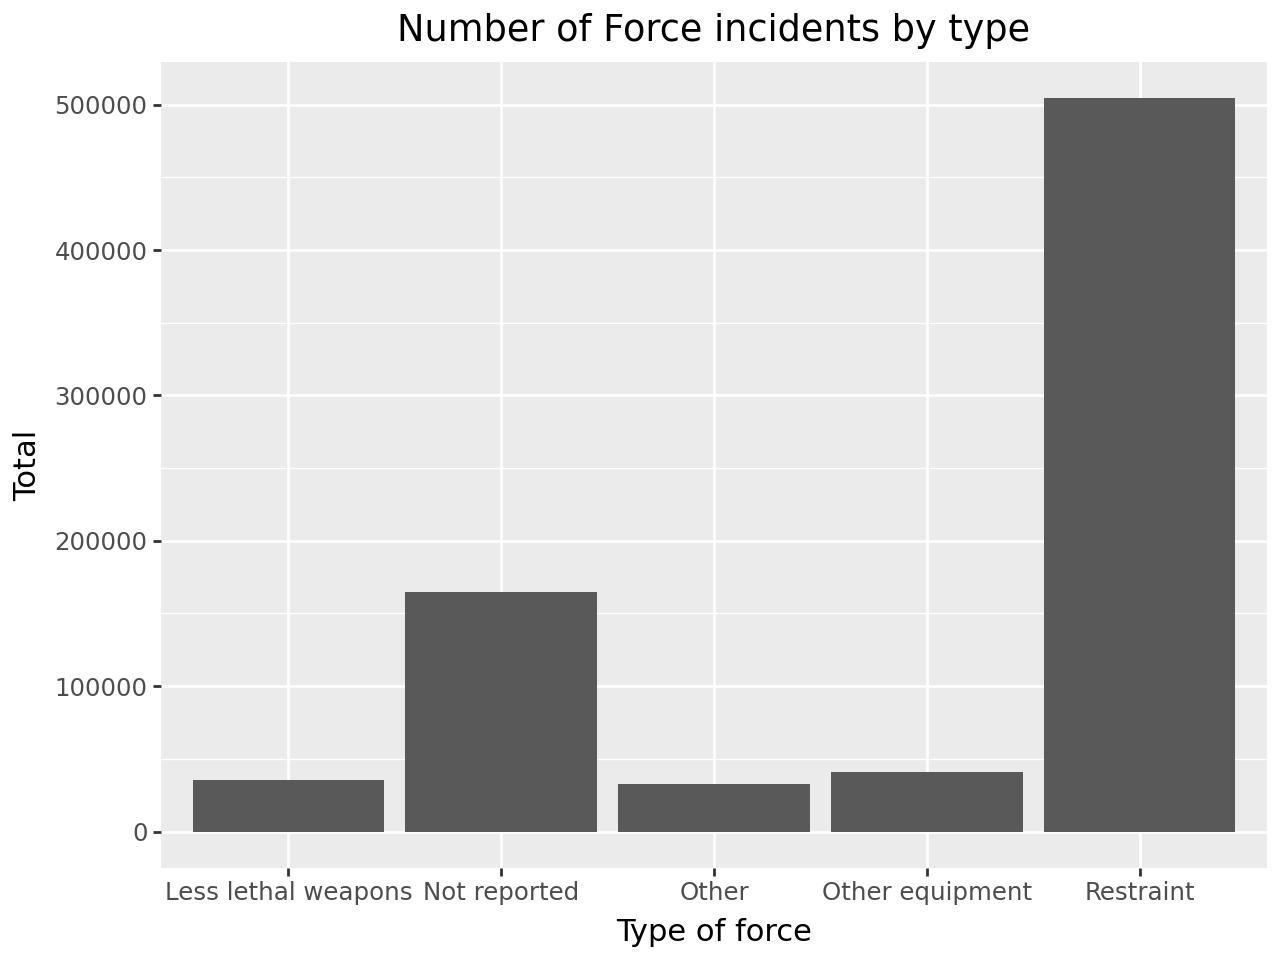

In [224]:
ggplot(Incidents_DataFrame)+ geom_bar(mapping = aes(x = 'Type of force', y = 'Total'), stat = "identity") + labs(title="Number of Force incidents by type")

In [225]:
fig = px.treemap(Incidents_DataFrame, path=[px.Constant("all"), 'Type of force', 'Tactic'],
                 values='Total', color='Tactic')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [226]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Handcuffing, of which'].index)

In [227]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Baton, of which'].index)

In [228]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Irritant spray, of which'].index)

In [229]:
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'CED, of which'].index)

In [230]:
Incidents_DataFrame

,Type of force,Tactic,Total
2,Restraint,Compliant handcuffing,106615.0
3,Restraint,Non-compliant handcuffing,77763.0
4,Restraint,Not stated,34432.0
5,Restraint,Limb / Body restraints,21646.0
6,Restraint,Ground restraint,45106.0
10,Other equipment,Baton drawn,2756.0
11,Other equipment,Baton used,1377.0
12,Other equipment,Not stated,893.0
14,Other equipment,Irritant spray - drawn,4705.0
15,Other equipment,Irritant spray - used,5635.0


In [231]:
Treemap_Tactic = px.treemap(Incidents_DataFrame, path=[px.Constant("all"), 'Type of force', 'Tactic'],
                 values='Total', color='Tactic')
Treemap_Tactic.update_layout(margin = dict(t=50, l=25, r=25, b=25))
Treemap_Tactic.show()

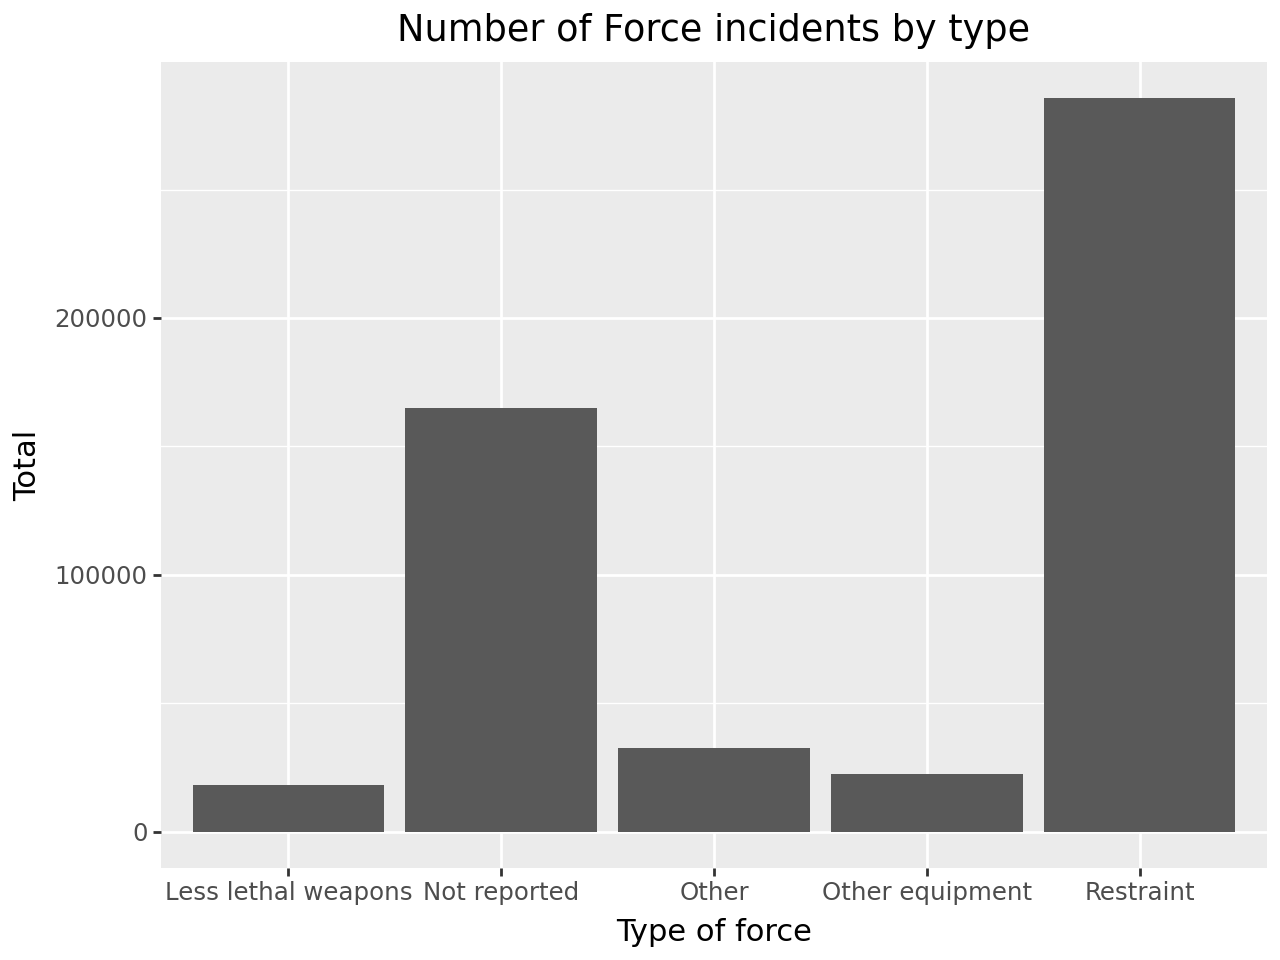

In [232]:
Barplot_Force = ggplot(Incidents_DataFrame)+ geom_bar(mapping = aes(x = 'Type of force', y = 'Total'), stat = "identity") + labs(title="Number of Force incidents by type")
Barplot_Force

In [233]:
Age_Type_DataFrame = pd.read_excel(FullPoliceData, 3, skiprows = 4)

In [ ]:
Age_Type_DataFrame

In [ ]:
Age_Type_DataFrame.drop([0,1])

In [ ]:
Age_Type_DataFrame.rename(columns={"Unnamed: 0": "Type of force", "Unnamed: 1": "Tactic", "Unnamed: 10": "Total incidents per tactic"})


In [237]:
Age_Type_DataFrame.drop(Age_Type_DataFrame.tail(8).index,inplace=True)

In [ ]:
Age_Type_DataFrame

In [239]:
Age_Type_DataFrame = Age_Type_DataFrame.rename(columns={"Unnamed: 0": "Type of force", "Unnamed: 1": "Tactic", "Unnamed: 10": "Total incidents per tactic"})


In [ ]:
Age_Type_DataFrame

In [241]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(columns=['Unnamed: 9'])

In [ ]:
Age_Type_DataFrame

In [243]:
Age_Type_DataFrame = Age_Type_DataFrame.iloc[[*np.arange(1, len(Age_Type_DataFrame)), *np.arange(1)]]

In [ ]:
Age_Type_DataFrame

In [245]:
Age_Type_DataFrame = Age_Type_DataFrame.drop([1,2,35])

In [ ]:
Age_Type_DataFrame

In [247]:
Age_Type_DataFrame.drop(Age_Type_DataFrame.tail(1).index,inplace=True)

In [ ]:
Age_Type_DataFrame

In [249]:
Age_Type_DataFrame['Type of force'] =  Age_Type_DataFrame['Type of force'].ffill()


In [ ]:
Age_Type_DataFrame

In [251]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Restraint'].index)

In [252]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Handcuffing, of which'].index)

In [253]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Unarmed skills'].index)

In [254]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Other equipment'].index)

In [255]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Baton, of which'].index)

In [256]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Irritant spray, of which'].index)

In [257]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Less lethal weapons'].index)

In [258]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'AEP, of which'].index)

In [259]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Other'].index)

In [260]:
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Dog use, of which'].index)

In [ ]:
Age_Type_DataFrame

In [262]:
#age_groups = ["Under 11 years", "11 - 17 years", "18 - 34 years", "35 - 49 years", "50 - 64 years", "65 and over", "Not reported"]
#Age_Type_DataFrame['Age Group Bracket'] = Age_Type_DataFrame[age_groups].apply(lambda row: sorted(row), axis=1)

In [263]:
Age_Type_DataFrame_long = Age_Type_DataFrame.melt(id_vars=["Type of force", "Tactic", "Total incidents per tactic"], 
                  value_vars=["Under 11 years", "11 - 17 years", "18 - 34 years", "35 - 49 years", "50 - 64 years", "65 and over", "Not reported"],
                  var_name="Age Group", value_name="Incident Count")

In [264]:
Age_Type_DataFrame_long

,Type of force,Tactic,Total incidents per tactic,Age Group,Incident Count
0,Restraint,Compliant handcuffing,106615,Under 11 years,109.0
1,Restraint,Non-compliant handcuffing,77763,Under 11 years,81.0
2,Restraint,Not stated,34432,Under 11 years,9.0
3,Restraint,Limb / Body restraints,21646,Under 11 years,43.0
4,Restraint,Ground restraint,45106,Under 11 years,94.0
...,...,...,...,...,...
156,Other,Dog deployed,1238,Not reported,281.0
157,Other,Dog bite,414,Not reported,46.0
158,Other,Not stated,268,Not reported,81.0
159,Other,Other / improvised,28760,Not reported,5165.0


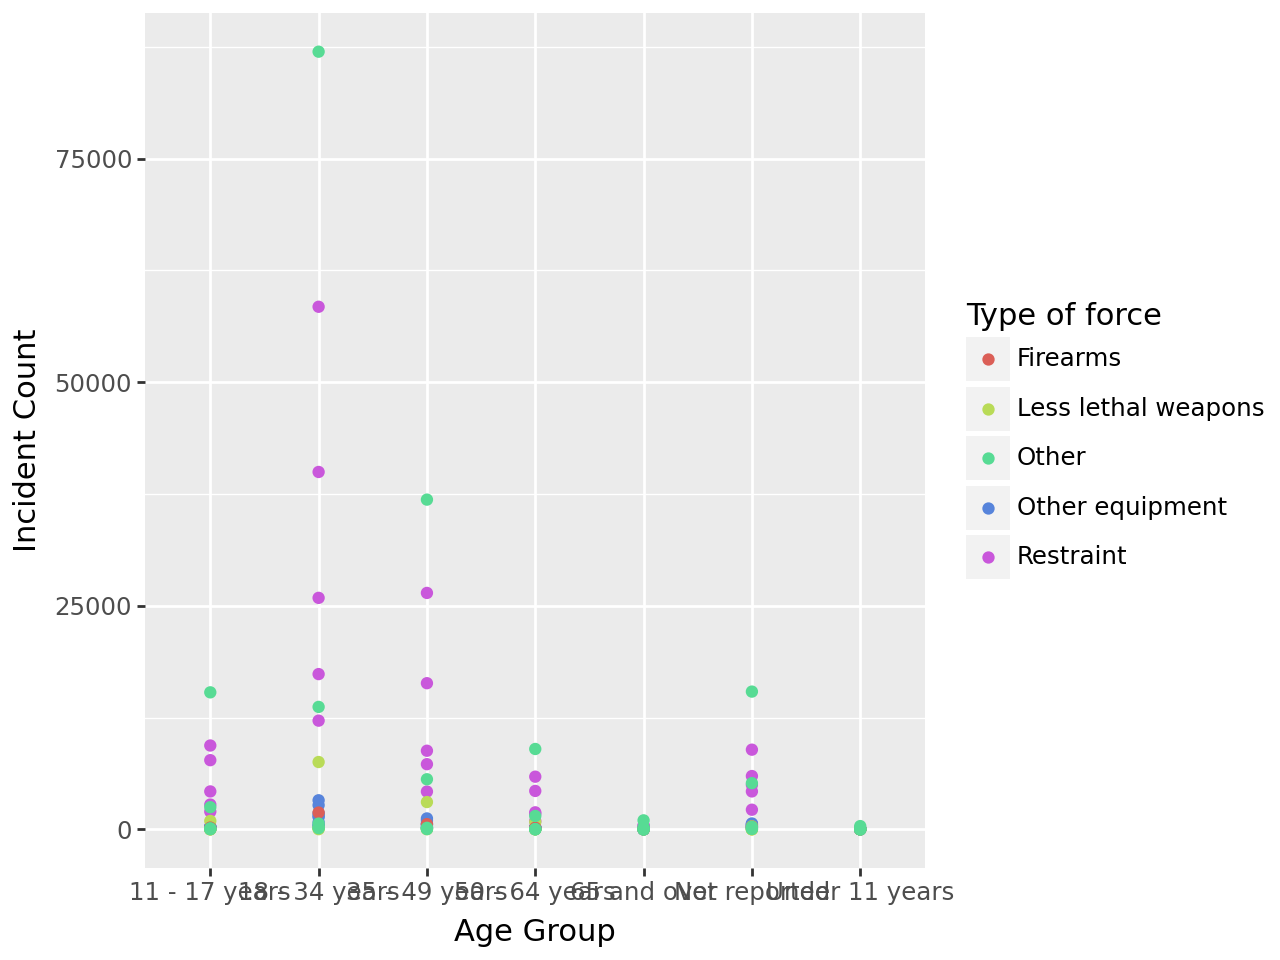

In [265]:
ggplot(Age_Type_DataFrame_long, aes("Age Group", "Incident Count")) + geom_point(aes(color="Type of force"))

In [266]:
Age_Long_DF_Bubble = (ggplot(Age_Type_DataFrame_long, aes( x = 'Tactic', y = 'Incident Count', size = 'Incident Count', color = 'Age Group'))) + geom_point(alpha = 0.6) + labs(title='Bubble Plot of Incident Count by Tactic and Age Group', x='Tactic', y='Incident Count') + theme_bw() + theme (figure_size=(11, 6), axis_text_x=element_text(rotation=90, size=5)) + scale_size_continuous() + scale_size_area(max_size=30)



c:\Users\harve\anaconda3\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning:

Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.




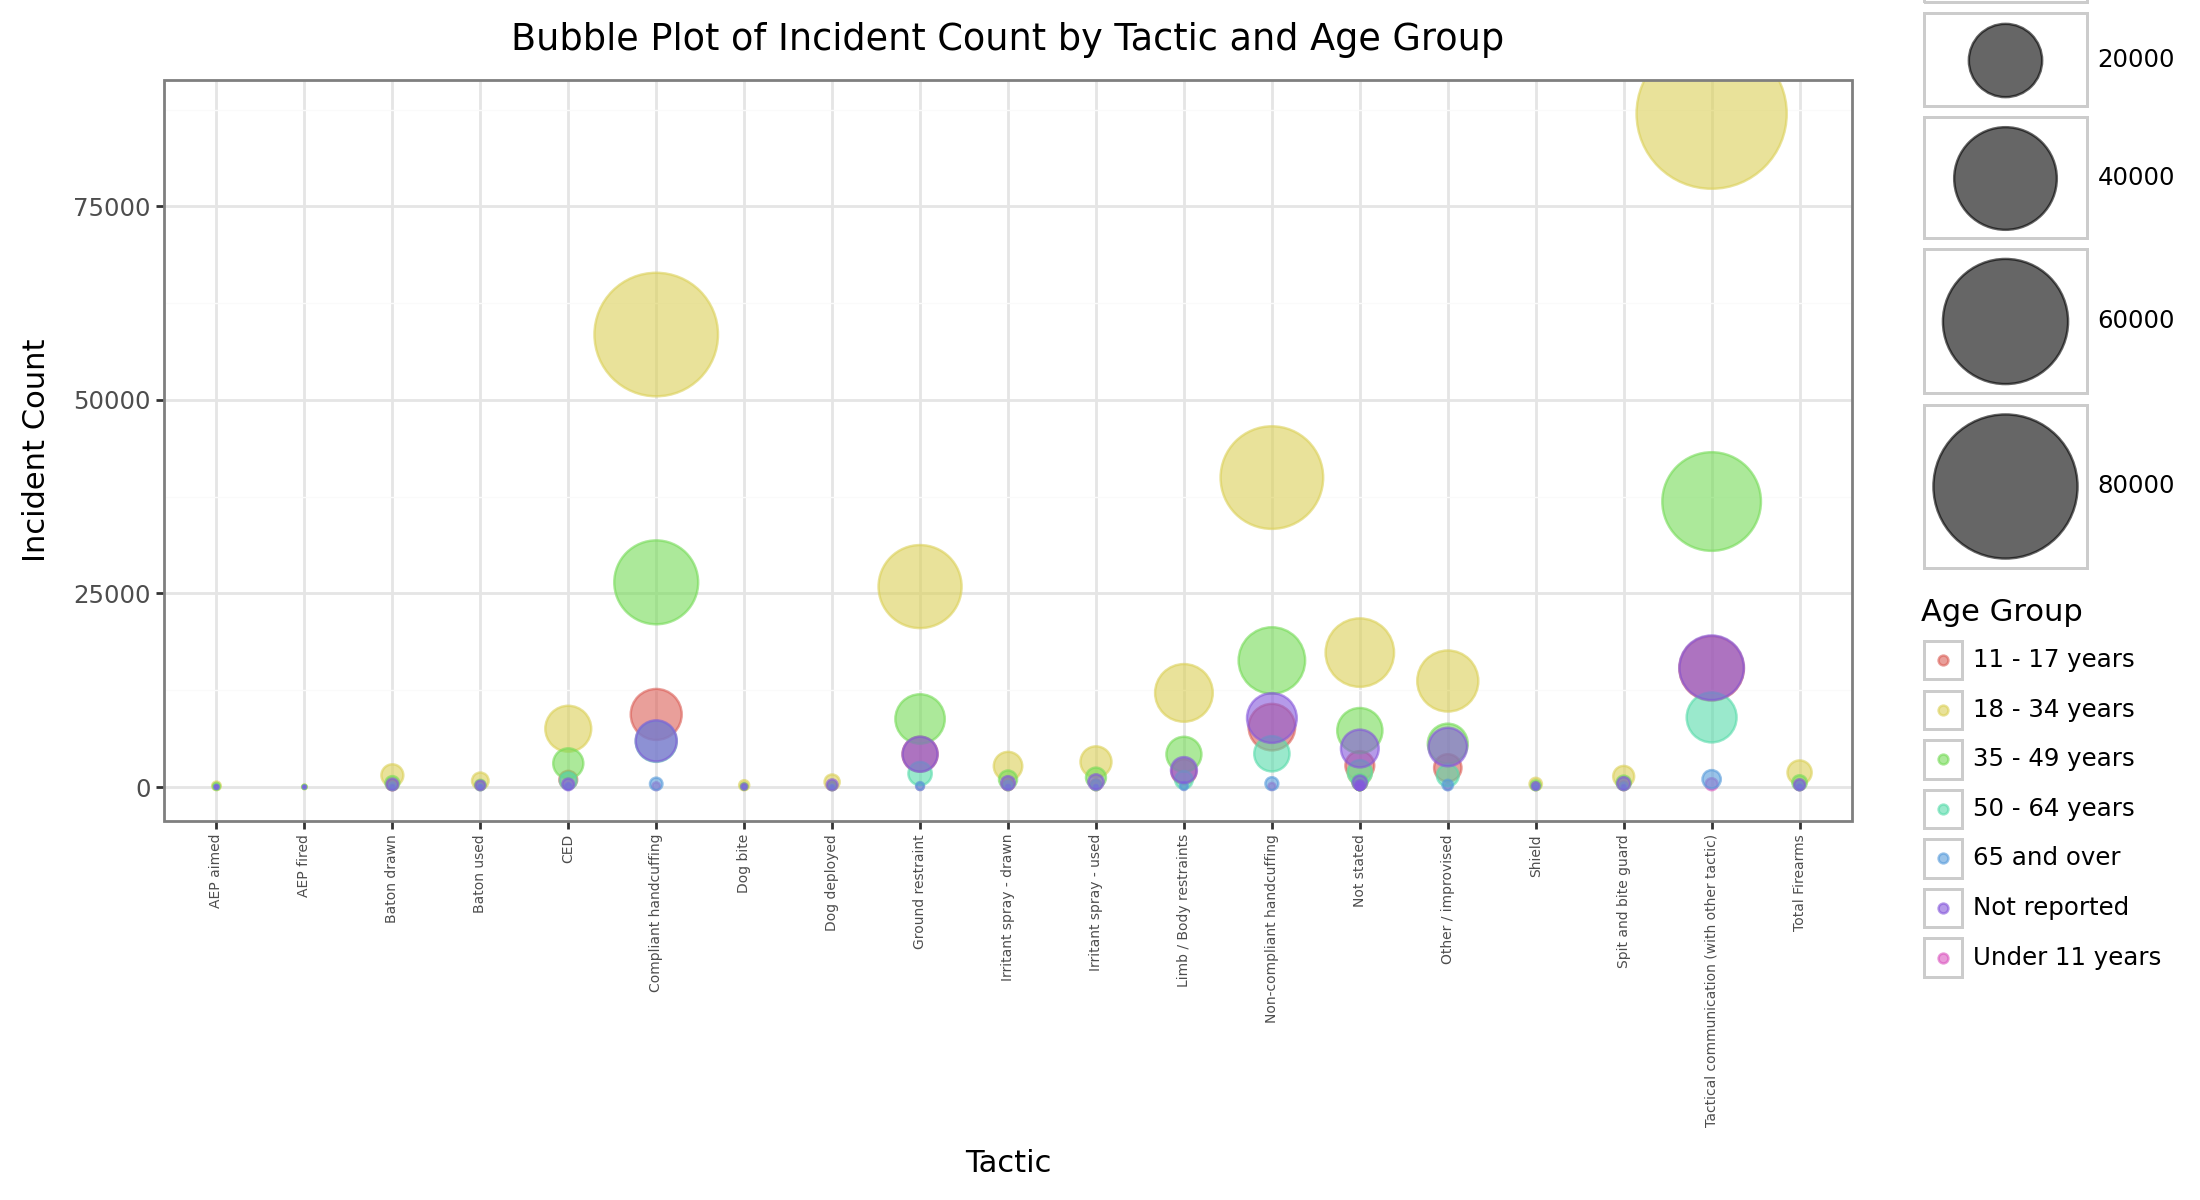

In [267]:
Age_Long_DF_Bubble

In [268]:
Age_Type_DataFrame_long = Age_Type_DataFrame_long.drop(Age_Type_DataFrame_long[Age_Type_DataFrame_long['Tactic'] == 'Tactical communication (with other tactic)'].index)

In [269]:
Age_Long_DF_Bubble = (ggplot(Age_Type_DataFrame_long, aes( x = 'Tactic', y = 'Incident Count', size = 'Incident Count', color = 'Age Group'))) + geom_point(alpha = 0.6) + labs(title='Bubble Plot of Incident Count by Tactic and Age Group', x='Tactic', y='Incident Count') + theme_bw() + theme (figure_size=(11, 6), axis_text_x=element_text(rotation=90, size=5)) + scale_size_continuous() + scale_size_area(max_size=30)


c:\Users\harve\anaconda3\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning:

Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.




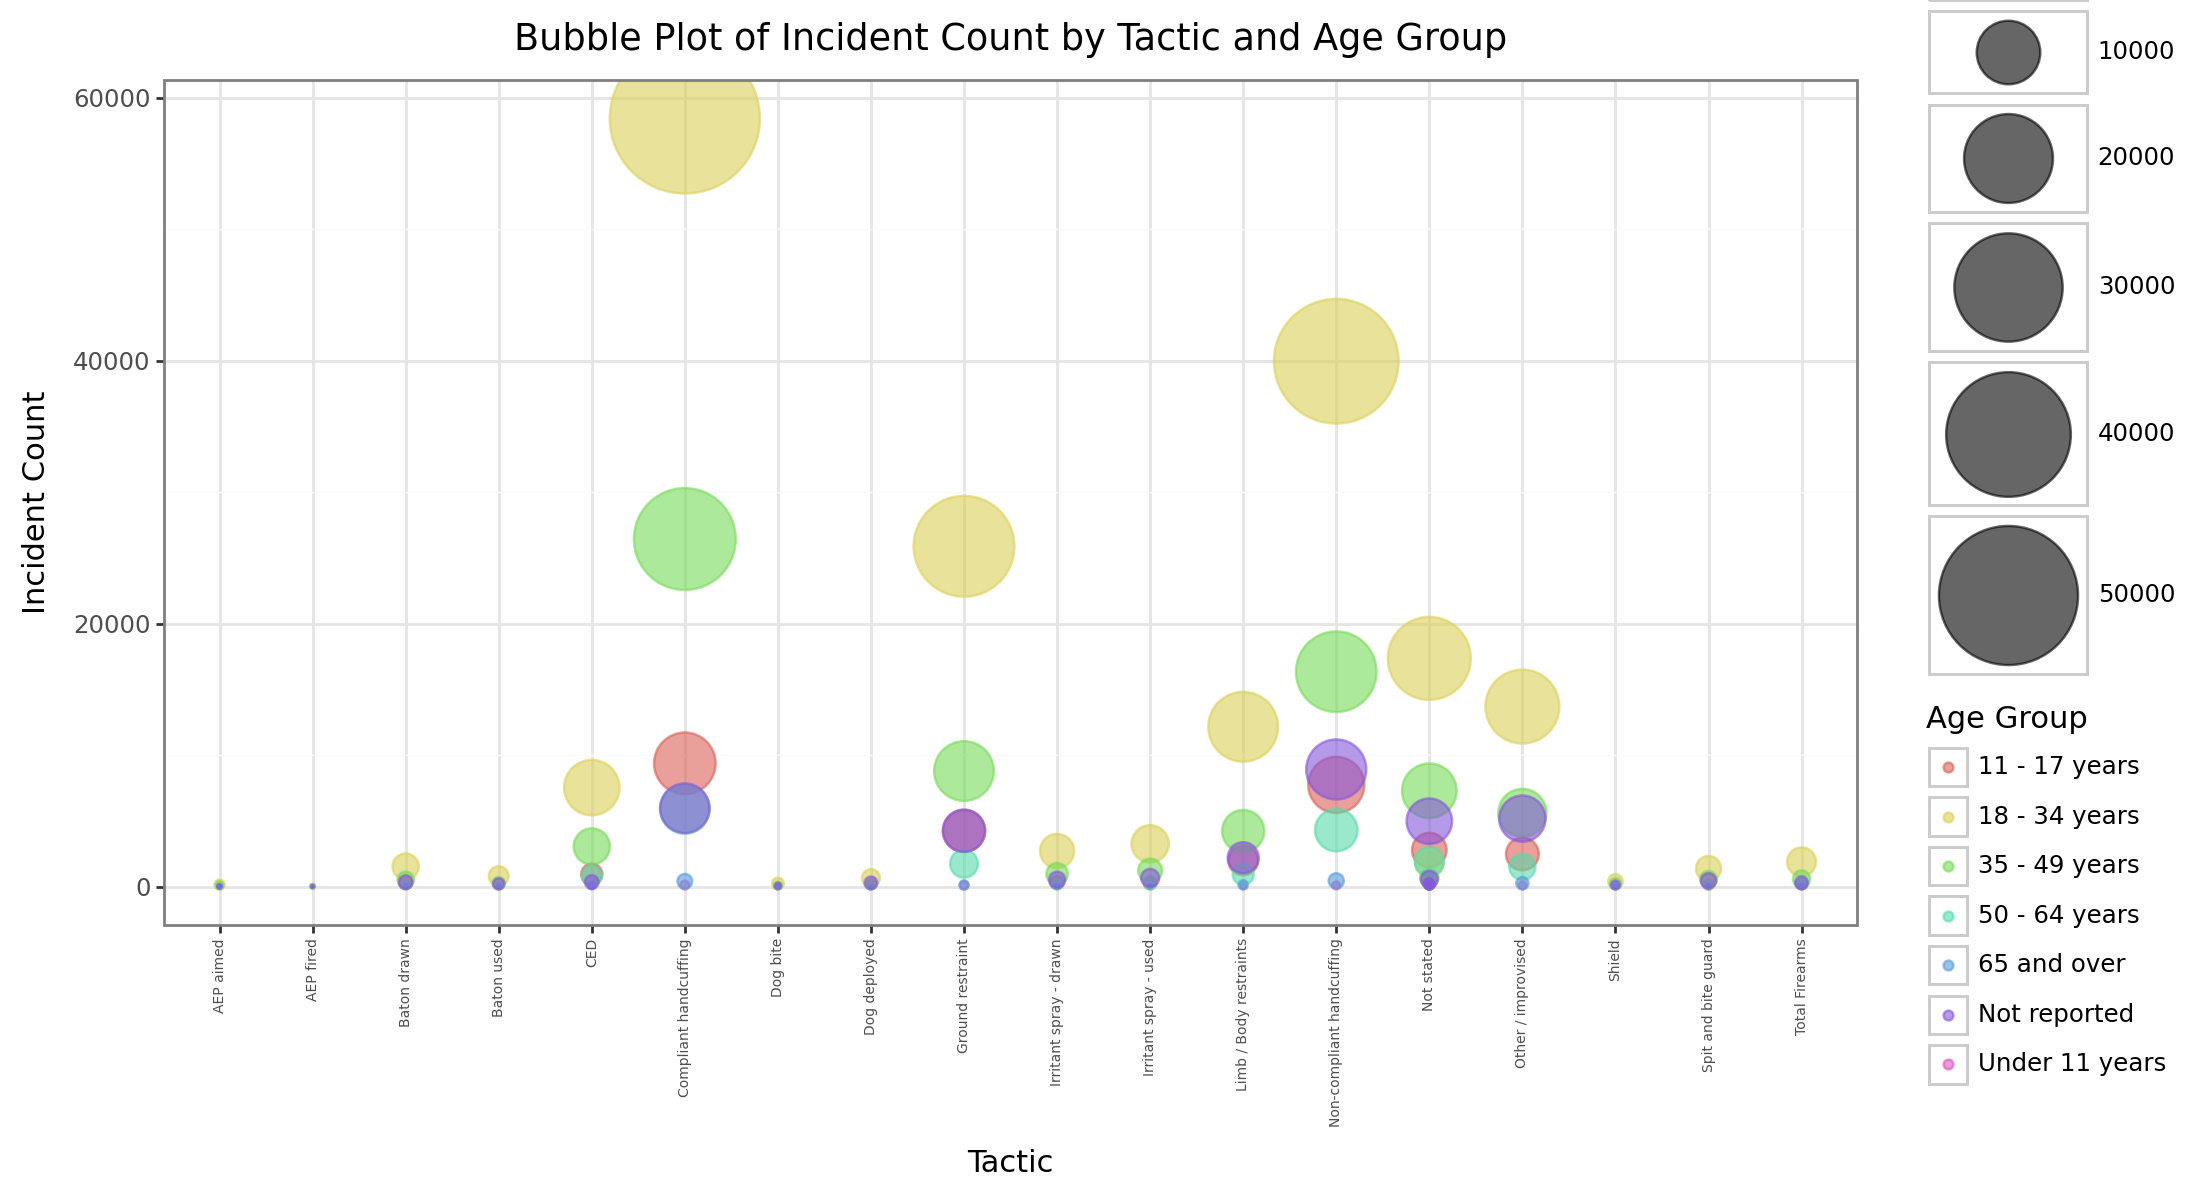

In [378]:
Age_Long_DF_Bubble

In [271]:
Gender_DF = pd.read_excel(FullPoliceData, 4, skiprows=4)

In [ ]:
Gender_DF

In [273]:
Gender_DF = Gender_DF.rename(columns={"Unnamed: 0": "Type of force", "Unnamed: 1": "Tactic", "Unnamed: 7": "Total incidents per tactic"})


In [274]:
Gender_DF = Gender_DF.drop(columns=['Unnamed: 6'])

In [275]:
Gender_DF = Gender_DF.drop(Gender_DF.index[34:44])

In [276]:
Gender_DF['Other'] = Gender_DF['Other'] + Gender_DF['Not reported']

In [277]:
Gender_DF = Gender_DF.drop(columns=['Not reported'])

In [278]:
Gender_DF = Gender_DF.drop([0,1,2])

In [279]:
Gender_DF

,Type of force,Tactic,Male,Female,Other,Total incidents per tactic
3,Restraint,Total Restraint,234140.0,45465.0,5957.0,285562
4,Restraint,"Handcuffing, of which",181731.0,33150.0,3929.0,218810
5,Restraint,Compliant handcuffing,93604.0,12116.0,895.0,106615
6,Restraint,Non-compliant handcuffing,60604.0,15691.0,1468.0,77763
7,Restraint,Not stated,27523.0,5343.0,1566.0,34432
8,Restraint,Limb / Body restraints,15820.0,4907.0,919.0,21646
9,Restraint,Ground restraint,36589.0,7408.0,1109.0,45106
10,Unarmed skills,Total Unarmed skills,85922.0,21197.0,2536.0,109655
11,Other equipment,Total Other equipment,19653.0,1773.0,791.0,22217
12,Other equipment,"Baton, of which",4489.0,262.0,275.0,5026


In [280]:
Gender_DF = Gender_DF.drop([44])

In [281]:
Gender_DF

,Type of force,Tactic,Male,Female,Other,Total incidents per tactic
3,Restraint,Total Restraint,234140.0,45465.0,5957.0,285562
4,Restraint,"Handcuffing, of which",181731.0,33150.0,3929.0,218810
5,Restraint,Compliant handcuffing,93604.0,12116.0,895.0,106615
6,Restraint,Non-compliant handcuffing,60604.0,15691.0,1468.0,77763
7,Restraint,Not stated,27523.0,5343.0,1566.0,34432
8,Restraint,Limb / Body restraints,15820.0,4907.0,919.0,21646
9,Restraint,Ground restraint,36589.0,7408.0,1109.0,45106
10,Unarmed skills,Total Unarmed skills,85922.0,21197.0,2536.0,109655
11,Other equipment,Total Other equipment,19653.0,1773.0,791.0,22217
12,Other equipment,"Baton, of which",4489.0,262.0,275.0,5026


In [282]:
#I can't use this since it removes the only field for 'Firearms' so I do it manually
# Gender_DF = Gender_DF[~Gender_DF['Tactic'].str.contains('total', case=False, na=False)]


In [283]:
Gender_DF

,Type of force,Tactic,Male,Female,Other,Total incidents per tactic
3,Restraint,Total Restraint,234140.0,45465.0,5957.0,285562
4,Restraint,"Handcuffing, of which",181731.0,33150.0,3929.0,218810
5,Restraint,Compliant handcuffing,93604.0,12116.0,895.0,106615
6,Restraint,Non-compliant handcuffing,60604.0,15691.0,1468.0,77763
7,Restraint,Not stated,27523.0,5343.0,1566.0,34432
8,Restraint,Limb / Body restraints,15820.0,4907.0,919.0,21646
9,Restraint,Ground restraint,36589.0,7408.0,1109.0,45106
10,Unarmed skills,Total Unarmed skills,85922.0,21197.0,2536.0,109655
11,Other equipment,Total Other equipment,19653.0,1773.0,791.0,22217
12,Other equipment,"Baton, of which",4489.0,262.0,275.0,5026


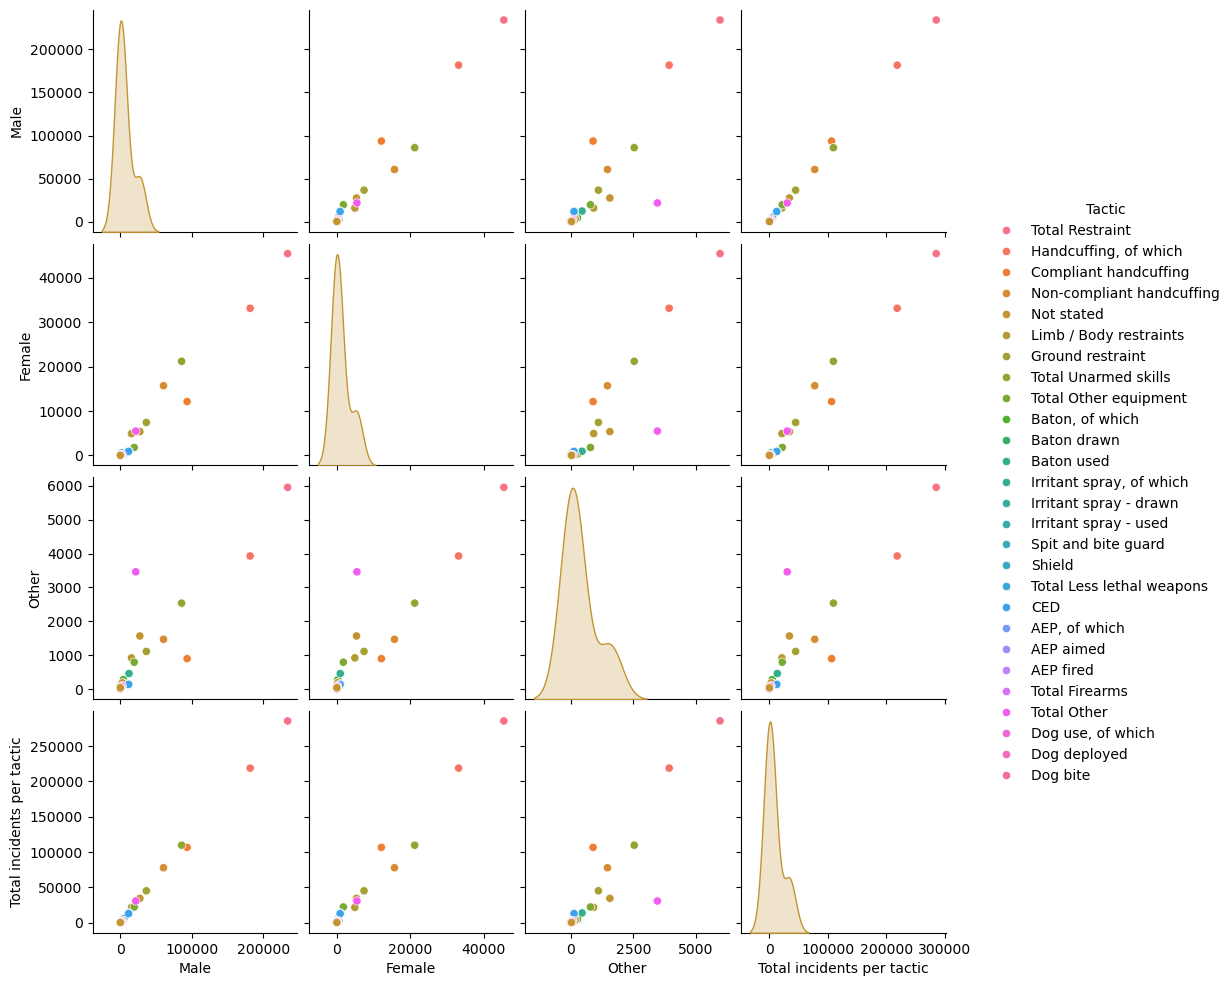

In [284]:
Pairplot_Tactic = sns.pairplot(data = Gender_DF, hue = 'Tactic')
Pairplot_Tactic

In [285]:
Gender_DF_Long = Gender_DF.melt(id_vars=["Type of force", "Tactic", "Total incidents per tactic"], 
                  value_vars=["Male", "Female", "Other"],
                  var_name="Gender", value_name="Incident Count")

In [286]:
Gender_DF_Long

,Type of force,Tactic,Total incidents per tactic,Gender,Incident Count
0,Restraint,Total Restraint,285562,Male,234140.0
1,Restraint,"Handcuffing, of which",218810,Male,181731.0
2,Restraint,Compliant handcuffing,106615,Male,93604.0
3,Restraint,Non-compliant handcuffing,77763,Male,60604.0
4,Restraint,Not stated,34432,Male,27523.0
...,...,...,...,...,...
88,Other,Total Other,30680,Other,3460.0
89,Other,"Dog use, of which",1920,Other,74.0
90,Other,Dog deployed,1238,Other,30.0
91,Other,Dog bite,414,Other,7.0


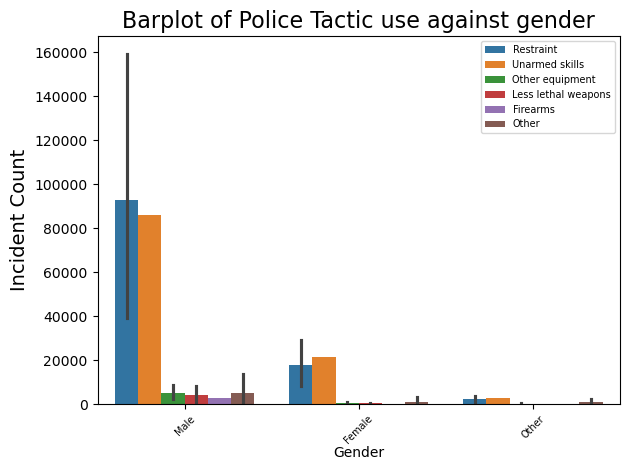

In [287]:
sns.barplot(x = 'Gender', y = 'Incident Count', data = Gender_DF_Long, hue = 'Type of force')
plt.title('Barplot of Police Tactic use against gender', fontsize=16)
plt.xlabel('Gender',fontsize=10, loc = 'center', labelpad=0.1)
plt.ylabel('Incident Count',fontsize=14)
plt.legend(loc='best',fontsize=7, alignment = 'left').set_visible(True)
plt.xticks(rotation = 45, fontsize = 7)
plt.tight_layout()
plt.show()

In [288]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Restraint'].index)

In [289]:
Gender_DF_Long

,Type of force,Tactic,Total incidents per tactic,Gender,Incident Count
1,Restraint,"Handcuffing, of which",218810,Male,181731.0
2,Restraint,Compliant handcuffing,106615,Male,93604.0
3,Restraint,Non-compliant handcuffing,77763,Male,60604.0
4,Restraint,Not stated,34432,Male,27523.0
5,Restraint,Limb / Body restraints,21646,Male,15820.0
...,...,...,...,...,...
88,Other,Total Other,30680,Other,3460.0
89,Other,"Dog use, of which",1920,Other,74.0
90,Other,Dog deployed,1238,Other,30.0
91,Other,Dog bite,414,Other,7.0


In [290]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Handcuffing, of which'].index)

In [291]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Unarmed skills'].index)

In [292]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Other equipment'].index)

In [293]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Baton, of which'].index)

In [294]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Less lethal weapons'].index)

In [295]:
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Other'].index)

<Axes: title={'center': 'Barplot of Police Tactic use against gender'}, xlabel='Gender', ylabel='Incident Count'>

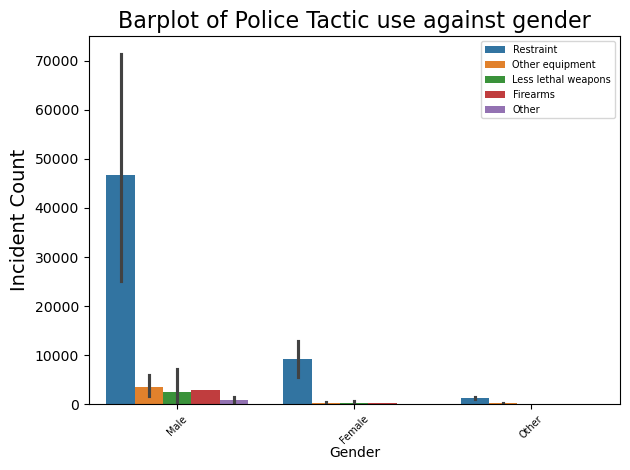

In [377]:
barplot_gender = sns.barplot(x = 'Gender', y = 'Incident Count', data = Gender_DF_Long, hue = 'Type of force')
plt.title('Barplot of Police Tactic use against gender', fontsize=16)
plt.xlabel('Gender',fontsize=10, loc = 'center', labelpad=0.1)
plt.ylabel('Incident Count',fontsize=14)
plt.legend(loc='best',fontsize=7, alignment = 'left').set_visible(True)
plt.xticks(rotation = 45, fontsize = 7)
plt.tight_layout()
barplot_gender

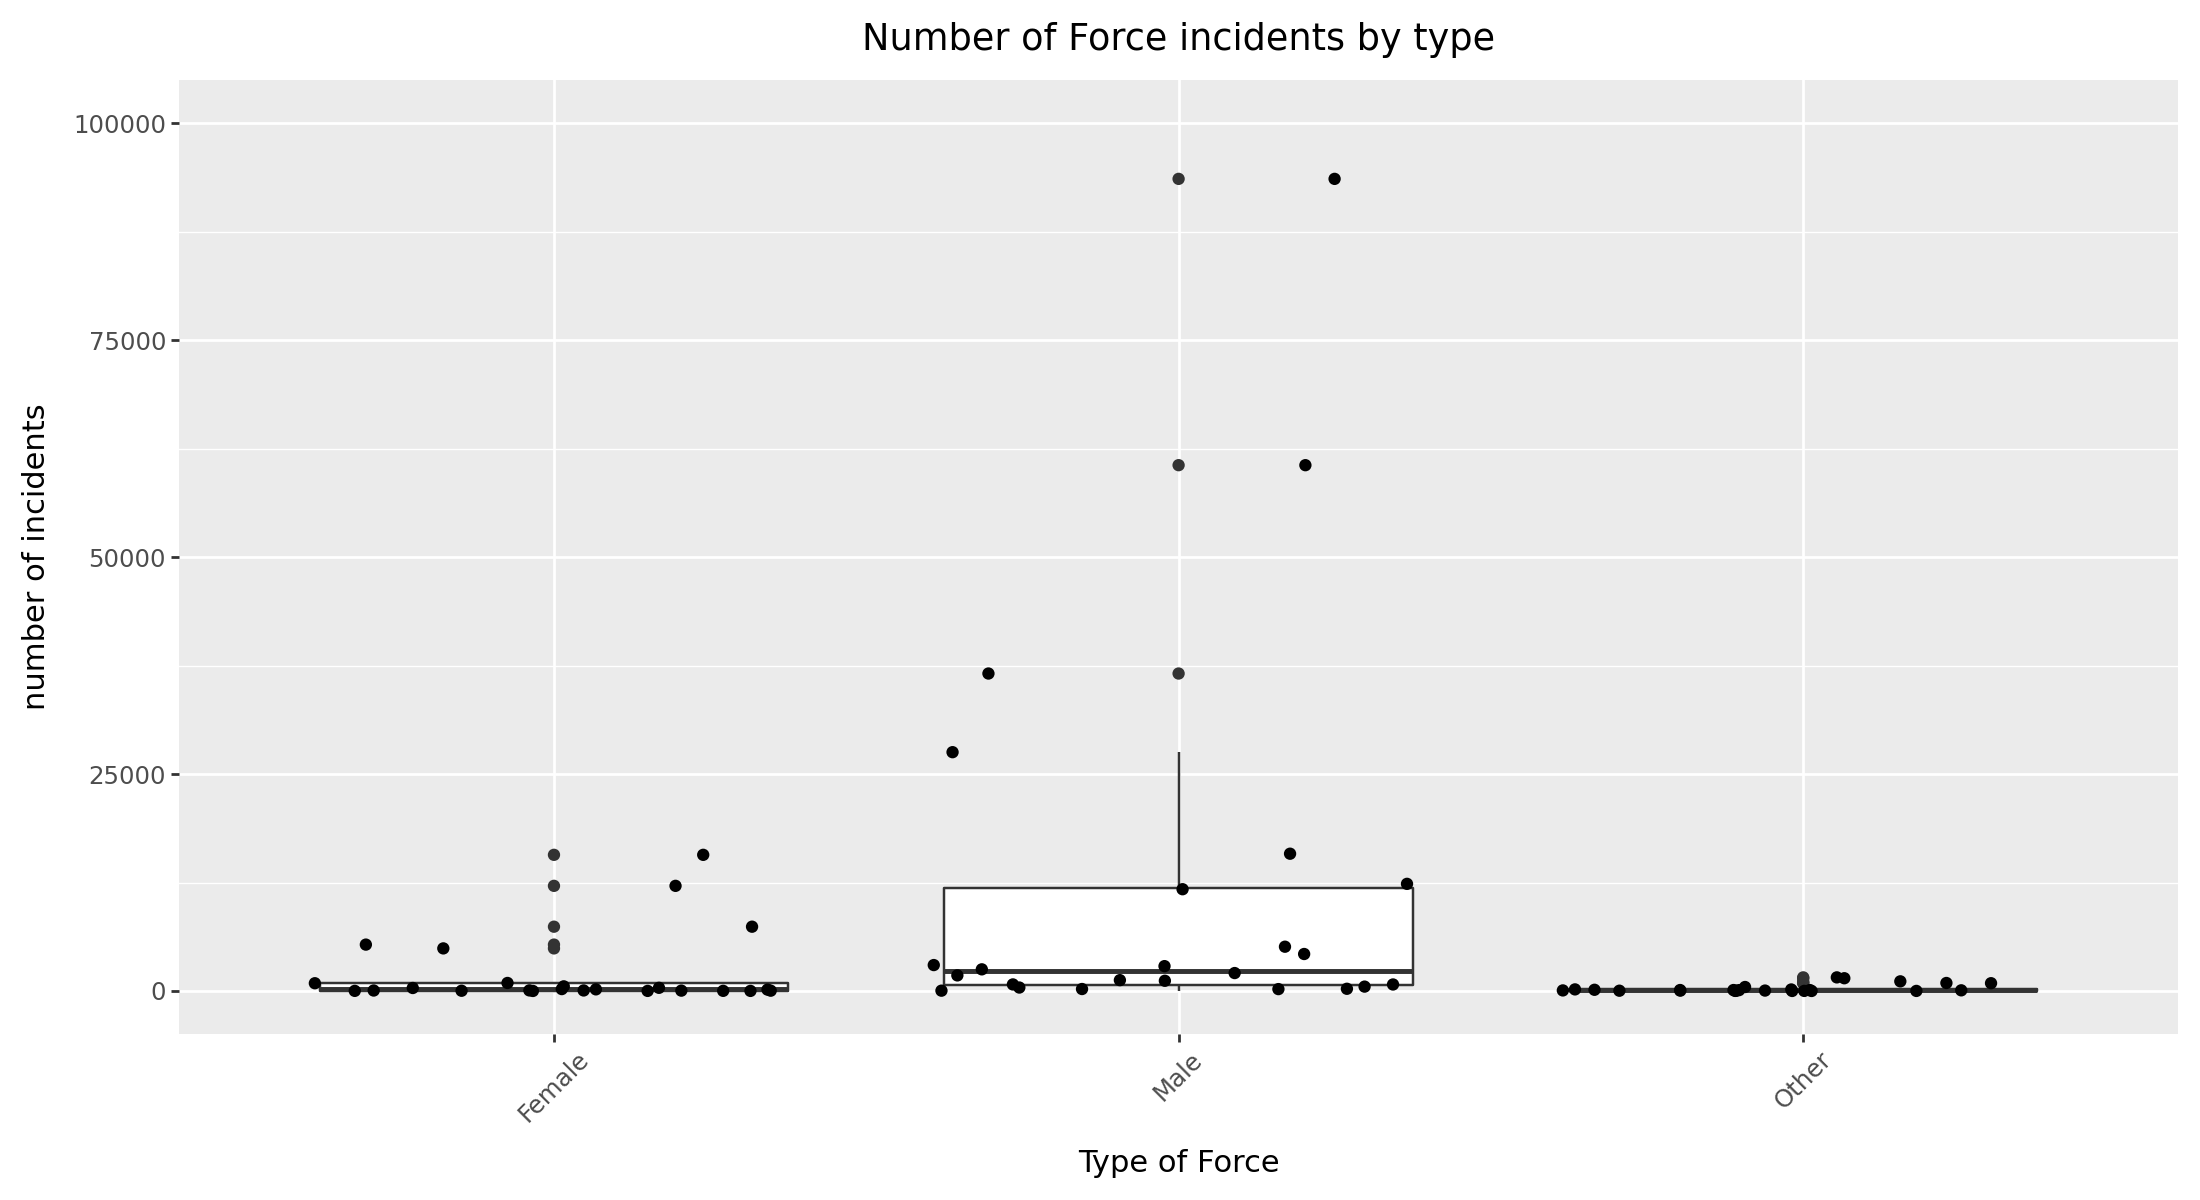

In [297]:
ggplot(data = Gender_DF_Long, mapping = aes(x = 'Gender', y = 'Incident Count')) + geom_boxplot()+ labs(y ="number of incidents", x="Type of Force", title="Number of Force incidents by type") + geom_jitter() + scale_y_continuous(limits = (0,100000)) + theme(figure_size=(11, 6), axis_text_x=element_text(rotation=45))


In [298]:
UK_Regions_Incidents = pd.read_excel(FullPoliceData, 13, skiprows = 3)

In [299]:
UK_Regions_Incidents = UK_Regions_Incidents.drop(UK_Regions_Incidents.index[54:57])

In [300]:
UK_Regions_Incidents

,Region,Police force,Total
0,England and Wales,Total England and Wales,313137.0
1,North East,Total North East,28429.0
2,North East,Cleveland,6315.0
3,North East,Durham,5594.0
4,North East,Northumbria,16520.0
5,North West,Total North West,26422.0
6,North West,Cheshire,4391.0
7,North West,Cumbria,4296.0
8,North West,Greater Manchester,5723.0
9,North West,Lancashire,7491.0


In [301]:
UK_Regions_Incidents = UK_Regions_Incidents[~UK_Regions_Incidents['Police force'].str.contains('total', case=False, na=False)]

In [302]:
UK_Regions_Incidents

,Region,Police force,Total
2,North East,Cleveland,6315.0
3,North East,Durham,5594.0
4,North East,Northumbria,16520.0
6,North West,Cheshire,4391.0
7,North West,Cumbria,4296.0
8,North West,Greater Manchester,5723.0
9,North West,Lancashire,7491.0
10,North West,Merseyside,4521.0
12,Yorkshire and the Humber,Humberside,3864.0
13,Yorkshire and the Humber,North Yorkshire,3504.0


In [303]:
region_totals = UK_Regions_Incidents.groupby('Region')['Total'].sum().reset_index()

In [304]:
region_totals

,Region,Total
0,East Midlands,17837.0
1,East of England,35361.0
2,London,62164.0
3,North East,28429.0
4,North West,26422.0
5,South East,49677.0
6,South West,27645.0
7,Wales,21296.0
8,West Midlands,15024.0
9,Yorkshire and the Humber,29282.0


In [305]:
region_totals['Region'] = region_totals['Region'].replace('Yorkshire and the Humber', 'Yorkshire and The Humber')

In [306]:
region_totals

,Region,Total
0,East Midlands,17837.0
1,East of England,35361.0
2,London,62164.0
3,North East,28429.0
4,North West,26422.0
5,South East,49677.0
6,South West,27645.0
7,Wales,21296.0
8,West Midlands,15024.0
9,Yorkshire and The Humber,29282.0


In [307]:
import requests
import matplotlib.colors as mcolors

In [308]:
geojson_url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/master/public/data/united-kingdom-regions.geojson'

In [309]:
response = requests.get(geojson_url)
geojson_data = response.text

In [310]:
gdf = gpd.read_file(StringIO(geojson_data))

In [311]:
regions_of_interest = [
    "East Midlands", "East of England", "London", "North East", 
    "North West", "South East", "South West", "Wales", 
    "West Midlands", "Yorkshire and The Humber"]

In [312]:
gdf_filtered = gdf[gdf['name'].isin(regions_of_interest)]

In [313]:
gdf_filtered

,geo_code,name,cartodb_id,created_at,updated_at,geometry
0,E12000009,South West,6,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-1.85742 52.05223, -1.87138 52..."
1,E12000007,London,5,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-0.05548 51.68316, -0.01109 51..."
2,E12000006,East of England,1,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((1.22987 52.94478, 1.31448 52.9..."
3,E12000003,Yorkshire and The Humber,2,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-0.3025 54.22754, -0.25577 54...."
4,E12000008,South East,3,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-0.44429 51.43485, -0.31634 51..."
5,E12000005,West Midlands,7,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-1.53731 52.5889, -1.52229 52...."
6,E12000004,East Midlands,4,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-1.19336 52.38582, -1.30715 52..."
7,E12000002,North West,8,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-2.30449 54.59623, -2.20948 54..."
8,E12000001,North East,9,2014-12-17 00:00:00+00:00,2014-12-17 00:00:00+00:00,"MULTIPOLYGON (((-1.21536 54.71356, -1.17513 54..."


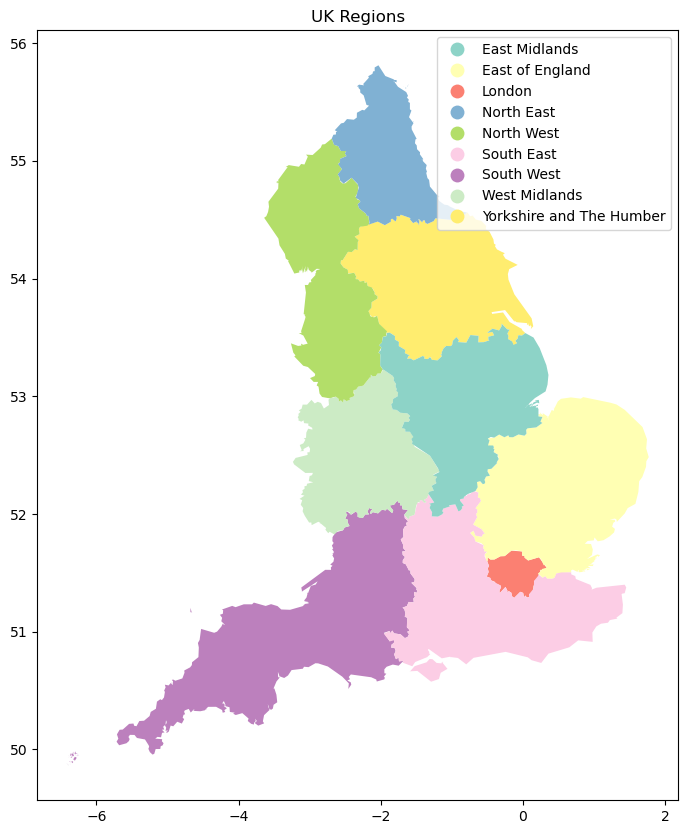

In [314]:
gdf_filtered.plot(column='name', figsize=(10, 10), legend=True, cmap='Set3')
plt.title("UK Regions")
plt.show()

In [315]:
#Attemping to make an interactive plot

In [316]:
gdf_filtered = gdf[gdf['name'].isin(region_totals['Region'])]
gdf_filtered = gdf_filtered.merge(region_totals, left_on='name', right_on='Region', how='left')

In [317]:
min_total = gdf_filtered['Total'].min()
max_total = gdf_filtered['Total'].max()

In [318]:
norm = mcolors.Normalize(vmin=min_total, vmax=max_total)

In [319]:
cmap = plt.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r')

In [320]:
m = folium.Map(location=[52.0, -1.5], zoom_start=6)

In [321]:
def style_function(feature):
    region = feature['properties']['name']
    total = gdf_filtered[gdf_filtered['name'] == region]['Total'].values[0]
    color = cmap.to_rgba(total)  # Get the color from the colormap
    return {
        'fillColor': mcolors.to_hex(color),  # Convert RGBA to Hex color
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

In [322]:
gdf_filtered = gdf_filtered.drop(columns=['created_at', 'updated_at'], errors='ignore')

In [323]:
folium.GeoJson(gdf_filtered, style_function=style_function).add_to(m)

In [324]:
m

In [325]:
#Try and get working in the Future

#fig = px.choropleth_mapbox(region_totals, locations="Region", featureidkey="properties.name", geojson=geojson_data, color="Total", hover_name="Total", mapbox_style="carto-positron", zoom=5, center = {"lat": 55, "lon": 0})
#fig.show()

In [326]:
FullPoliceTimeSeries = pd.ExcelFile('policeforceareatablesfinal.xlsx')

In [327]:
Knife_TimeSeries = pd.read_excel(FullPoliceTimeSeries, 8, skiprows = 7, header = 1)

In [328]:
#Number of Knife and sharp instrument offences recorded by the police for selected offences, by Police Force Area
#and the total percentages of these selected categories 

In [329]:
Knife_TimeSeries

,Area Codes,Area name,Apr 2010 to Mar 2011,% involving a knife Apr 2010\n to Mar 2011,Apr 2011 to Mar 2012\n[note 10],% involving a knife Apr 2011\n to Mar 2012,Apr 2012 to Mar 2013,% involving a knife Apr 2012 \nto Mar 2013,Apr 2013 to Mar 2014,% involving a knife Apr 2013\n to Mar 2014,...,% involving a knife Apr 2019 to Mar 2020,Apr 2020 to Mar 2021,% involving a knife Apr 2020 to Mar 2021,Apr 2021 to Mar 2022,% involving a knife Apr 2021 to Mar 2022,Jul 2022 to Jun 2023\n[note 3],% involving a knife Jul 2022 to Jun 2023,Jul 2023 to Jun 2024\n[note 3],% involving a knife Jul 2023 to Jun 2024,Jul 2023 to Jun 2024 compared with previous year % change
0,K04000001,"ENGLAND AND WALES [note 3, 9]",36068,7.330671,33740,7.371190,28902,6.836875,28337,6.510960,...,7.046589,44727,6.678672,49229,5.973458,49187,6.173036,50973,6.60113,3.631041
1,NaN,England and Wales (exc. Greater Manchester Pol...,34020,7.299975,32004,7.373820,27303,6.806250,26694,6.449945,...,6.998690,41671,6.566343,45570,5.867153,49187,6.173036,50973,6.60113,3.631041
2,E92000001,"ENGLAND [note 3, 9]",35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,...,7.195600,42814,6.730671,47384,6.074848,47294,6.295391,48881,6.729259,3.355605
3,NaN,England (exc. Greater Manchester Police)[note ...,32995,7.507993,31258,7.632279,26575,7.052701,26024,6.700240,...,7.153336,39758,6.615099,43725,5.968705,47294,6.295391,48881,6.729259,3.355605
4,E12000001,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,...,5.224179,1826,5.927994,1971,5.110719,2349,5.517452,2357,5.771303,0.34057
5,E23000013,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,...,8.892238,695,9.316354,767,8.282937,901,8.389199,812,8.231955,-9.877913
6,E23000008,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,...,4.220278,278,4.360784,299,3.819622,375,4.588278,390,5.058366,4
7,E23000007,Northumbria [note 11],389,4.156427,372,4.738854,316,4.456982,350,4.400855,...,4.111654,853,5.027110,905,4.213614,1073,4.534889,1155,4.964326,7.642125
8,E12000002,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,...,6.578341,5919,6.916255,6984,6.310026,2992,4.907734,3235,5.505727,8.121658
9,E23000006,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,...,4.885796,562,4.920329,533,3.896199,541,4.116886,557,4.497376,2.957486


In [330]:
Knife_TimeSeries.columns

Index(['Area Codes', 'Area name', 'Apr 2010 to Mar 2011',
       '% involving a knife Apr 2010\n to Mar 2011',
       'Apr 2011 to Mar 2012\n[note 10]',
       '% involving a knife Apr 2011\n to Mar 2012', 'Apr 2012 to Mar 2013',
       '% involving a knife Apr 2012 \nto Mar 2013', 'Apr 2013 to Mar 2014',
       '% involving a knife Apr 2013\n to Mar 2014', 'Apr 2014 to Mar 2015',
       '% involving a knife Apr 2014\n to Mar 2015', 'Apr 2015 to Mar 2016',
       '% involving a knife Apr 2015\n to Mar 2016', 'Apr 2016 to Mar 2017',
       '% involving a knife Apr 2016\n to Mar 2017', 'Apr 2017 to Mar 2018',
       '% involving a knife Apr 2017\n to Mar 2018', 'Apr 2018 to Mar 2019',
       '% involving a knife Apr 2018\n to Mar 2019', 'Apr 2019 to Mar 2020',
       '% involving a knife Apr 2019 to Mar 2020', 'Apr 2020 to Mar 2021',
       '% involving a knife Apr 2020 to Mar 2021', 'Apr 2021 to Mar 2022',
       '% involving a knife Apr 2021 to Mar 2022',
       'Jul 2022 to Jun 2023\n

In [331]:
Knife_TimeSeries = Knife_TimeSeries.drop(columns=['Area Codes'])

In [332]:
Knife_TimeSeries

,Area name,Apr 2010 to Mar 2011,% involving a knife Apr 2010\n to Mar 2011,Apr 2011 to Mar 2012\n[note 10],% involving a knife Apr 2011\n to Mar 2012,Apr 2012 to Mar 2013,% involving a knife Apr 2012 \nto Mar 2013,Apr 2013 to Mar 2014,% involving a knife Apr 2013\n to Mar 2014,Apr 2014 to Mar 2015,...,% involving a knife Apr 2019 to Mar 2020,Apr 2020 to Mar 2021,% involving a knife Apr 2020 to Mar 2021,Apr 2021 to Mar 2022,% involving a knife Apr 2021 to Mar 2022,Jul 2022 to Jun 2023\n[note 3],% involving a knife Jul 2022 to Jun 2023,Jul 2023 to Jun 2024\n[note 3],% involving a knife Jul 2023 to Jun 2024,Jul 2023 to Jun 2024 compared with previous year % change
0,"ENGLAND AND WALES [note 3, 9]",36068,7.330671,33740,7.371190,28902,6.836875,28337,6.510960,29162,...,7.046589,44727,6.678672,49229,5.973458,49187,6.173036,50973,6.60113,3.631041
1,England and Wales (exc. Greater Manchester Pol...,34020,7.299975,32004,7.373820,27303,6.806250,26694,6.449945,27401,...,6.998690,41671,6.566343,45570,5.867153,49187,6.173036,50973,6.60113,3.631041
2,"ENGLAND [note 3, 9]",35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,7.195600,42814,6.730671,47384,6.074848,47294,6.295391,48881,6.729259,3.355605
3,England (exc. Greater Manchester Police)[note ...,32995,7.507993,31258,7.632279,26575,7.052701,26024,6.700240,26506,...,7.153336,39758,6.615099,43725,5.968705,47294,6.295391,48881,6.729259,3.355605
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,5.224179,1826,5.927994,1971,5.110719,2349,5.517452,2357,5.771303,0.34057
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,8.892238,695,9.316354,767,8.282937,901,8.389199,812,8.231955,-9.877913
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,4.220278,278,4.360784,299,3.819622,375,4.588278,390,5.058366,4
7,Northumbria [note 11],389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,4.111654,853,5.027110,905,4.213614,1073,4.534889,1155,4.964326,7.642125
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6.578341,5919,6.916255,6984,6.310026,2992,4.907734,3235,5.505727,8.121658
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,4.885796,562,4.920329,533,3.896199,541,4.116886,557,4.497376,2.957486


In [333]:
Knife_TimeSeries.columns

Index(['Area name', 'Apr 2010 to Mar 2011',
       '% involving a knife Apr 2010\n to Mar 2011',
       'Apr 2011 to Mar 2012\n[note 10]',
       '% involving a knife Apr 2011\n to Mar 2012', 'Apr 2012 to Mar 2013',
       '% involving a knife Apr 2012 \nto Mar 2013', 'Apr 2013 to Mar 2014',
       '% involving a knife Apr 2013\n to Mar 2014', 'Apr 2014 to Mar 2015',
       '% involving a knife Apr 2014\n to Mar 2015', 'Apr 2015 to Mar 2016',
       '% involving a knife Apr 2015\n to Mar 2016', 'Apr 2016 to Mar 2017',
       '% involving a knife Apr 2016\n to Mar 2017', 'Apr 2017 to Mar 2018',
       '% involving a knife Apr 2017\n to Mar 2018', 'Apr 2018 to Mar 2019',
       '% involving a knife Apr 2018\n to Mar 2019', 'Apr 2019 to Mar 2020',
       '% involving a knife Apr 2019 to Mar 2020', 'Apr 2020 to Mar 2021',
       '% involving a knife Apr 2020 to Mar 2021', 'Apr 2021 to Mar 2022',
       '% involving a knife Apr 2021 to Mar 2022',
       'Jul 2022 to Jun 2023\n[note 3]',
   

In [334]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2010 to Mar 2011": "2010", "% involving a knife Apr 2010\n to Mar 2011": "2010 Knife %", "Apr 2011 to Mar 2012\n[note 10]": "2011", "% involving a knife Apr 2011\n to Mar 2012": "2011 Knife %"})

In [335]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2012 to Mar 2013": "2012", "% involving a knife Apr 2012 \nto Mar 2013": "2012 Knife %", "Apr 2013 to Mar 2014": "2013", "% involving a knife Apr 2013\n to Mar 2014": "2013 Knife %"})

In [336]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2014 to Mar 2015": "2014", "% involving a knife Apr 2014\n to Mar 2015": "2014 Knife %", "Apr 2015 to Mar 2016": "2015", "% involving a knife Apr 2015\n to Mar 2016": "2015 Knife %"})

In [337]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2016 to Mar 2017": "2016", "% involving a knife Apr 2016\n to Mar 2017": "2016 Knife %", "Apr 2017 to Mar 2018": "2017", "% involving a knife Apr 2017\n to Mar 2018": "2017 Knife %"})

In [338]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2018 to Mar 2019": "2018", "% involving a knife Apr 2018\n to Mar 2019": "2018 Knife %", "Apr 2019 to Mar 2020": "2019", "% involving a knife Apr 2019 to Mar 2020": "2019 Knife %"})

In [339]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2020 to Mar 2021": "2020", "% involving a knife Apr 2020 to Mar 2021": "2020 Knife %", "Apr 2021 to Mar 2022": "2021", "% involving a knife Apr 2021 to Mar 2022": "2021 Knife %"})

In [340]:
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Jul 2022 to Jun 2023\n[note 3]": "2022", "% involving a knife Jul 2022 to Jun 2023": "2022 Knife %", "Jul 2023 to Jun 2024\n[note 3]": "2023", "% involving a knife Jul 2023 to Jun 2024": "2023 Knife %"})

In [341]:
Knife_TimeSeries

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %,Jul 2023 to Jun 2024 compared with previous year % change
0,"ENGLAND AND WALES [note 3, 9]",36068,7.330671,33740,7.371190,28902,6.836875,28337,6.510960,29162,...,7.046589,44727,6.678672,49229,5.973458,49187,6.173036,50973,6.60113,3.631041
1,England and Wales (exc. Greater Manchester Pol...,34020,7.299975,32004,7.373820,27303,6.806250,26694,6.449945,27401,...,6.998690,41671,6.566343,45570,5.867153,49187,6.173036,50973,6.60113,3.631041
2,"ENGLAND [note 3, 9]",35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,7.195600,42814,6.730671,47384,6.074848,47294,6.295391,48881,6.729259,3.355605
3,England (exc. Greater Manchester Police)[note ...,32995,7.507993,31258,7.632279,26575,7.052701,26024,6.700240,26506,...,7.153336,39758,6.615099,43725,5.968705,47294,6.295391,48881,6.729259,3.355605
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,5.224179,1826,5.927994,1971,5.110719,2349,5.517452,2357,5.771303,0.34057
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,8.892238,695,9.316354,767,8.282937,901,8.389199,812,8.231955,-9.877913
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,4.220278,278,4.360784,299,3.819622,375,4.588278,390,5.058366,4
7,Northumbria [note 11],389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,4.111654,853,5.027110,905,4.213614,1073,4.534889,1155,4.964326,7.642125
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6.578341,5919,6.916255,6984,6.310026,2992,4.907734,3235,5.505727,8.121658
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,4.885796,562,4.920329,533,3.896199,541,4.116886,557,4.497376,2.957486


In [342]:
Knife_TimeSeries.columns

Index(['Area name', '2010', '2010 Knife %', '2011', '2011 Knife %', '2012',
       '2012 Knife %', '2013', '2013 Knife %', '2014', '2014 Knife %', '2015',
       '2015 Knife %', '2016', '2016 Knife %', '2017', '2017 Knife %', '2018',
       '2018 Knife %', '2019', '2019 Knife %', '2020', '2020 Knife %', '2021',
       '2021 Knife %', '2022', '2022 Knife %', '2023', '2023 Knife %',
       'Jul 2023 to Jun 2024 compared with previous year % change'],
      dtype='object')

In [343]:
Knife_TimeSeries = Knife_TimeSeries.drop(columns=['Jul 2023 to Jun 2024 compared with previous year % change'])

In [344]:
Knife_TimeSeries

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
0,"ENGLAND AND WALES [note 3, 9]",36068,7.330671,33740,7.371190,28902,6.836875,28337,6.510960,29162,...,55170,7.046589,44727,6.678672,49229,5.973458,49187,6.173036,50973,6.60113
1,England and Wales (exc. Greater Manchester Pol...,34020,7.299975,32004,7.373820,27303,6.806250,26694,6.449945,27401,...,51982,6.998690,41671,6.566343,45570,5.867153,49187,6.173036,50973,6.60113
2,"ENGLAND [note 3, 9]",35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,53265,7.195600,42814,6.730671,47384,6.074848,47294,6.295391,48881,6.729259
3,England (exc. Greater Manchester Police)[note ...,32995,7.507993,31258,7.632279,26575,7.052701,26024,6.700240,26506,...,50077,7.153336,39758,6.615099,43725,5.968705,47294,6.295391,48881,6.729259
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349,5.517452,2357,5.771303
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,708,8.892238,695,9.316354,767,8.282937,901,8.389199,812,8.231955
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,328,4.220278,278,4.360784,299,3.819622,375,4.588278,390,5.058366
7,Northumbria [note 11],389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,791,4.111654,853,5.027110,905,4.213614,1073,4.534889,1155,4.964326
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992,4.907734,3235,5.505727
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,646,4.885796,562,4.920329,533,3.896199,541,4.116886,557,4.497376


In [345]:
Knife_TimeSeries = Knife_TimeSeries.drop([0,1,3])

In [346]:
Knife_TimeSeries

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
2,"ENGLAND [note 3, 9]",35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,53265,7.195600,42814,6.730671,47384,6.074848,47294,6.295391,48881,6.729259
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349,5.517452,2357,5.771303
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,708,8.892238,695,9.316354,767,8.282937,901,8.389199,812,8.231955
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,328,4.220278,278,4.360784,299,3.819622,375,4.588278,390,5.058366
7,Northumbria [note 11],389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,791,4.111654,853,5.027110,905,4.213614,1073,4.534889,1155,4.964326
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992,4.907734,3235,5.505727
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,646,4.885796,562,4.920329,533,3.896199,541,4.116886,557,4.497376
10,Cumbria,128,3.991269,90,2.892031,93,3.476636,101,3.397242,91,...,206,3.454637,186,4.040843,215,3.544930,205,3.265891,193,3.325293
11,"Greater Manchester [note 3, 9]",2048,7.881167,1736,7.323041,1599,7.405864,1643,7.693388,1761,...,3188,7.931729,3056,8.710523,3659,7.714201,[x],[x],[x],[x]
12,Lancashire,590,4.785077,587,4.592396,516,4.154255,568,4.267147,523,...,974,4.609342,880,4.925281,1017,4.539165,1027,4.747816,1185,5.319627


In [347]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("ENGLAND [note 3, 9]", "England")

In [348]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Northumbria [note 11]", "Northumbria")

In [349]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Greater Manchester [note 3, 9]", "Manchester")

In [350]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Leicestershire [note 6]", "Leicestershire")

In [351]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Essex [note 11]", "Essex")

In [352]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Surrey [note 7][note 11]", "Surrey")

In [353]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Norfolk [note 11]", "Norfolk")

In [354]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Sussex [note 11][note 12]", "Sussex")

In [355]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Suffolk [note 11]", "Suffolk")

In [356]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Thames Valley [note 11]", "Thames Valley")

In [357]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Avon and Somerset [note 11]", "Avon and Somerset")

In [358]:
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("WALES", "Wales")

In [359]:
Knife_TimeSeries

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
2,England,35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,53265,7.195600,42814,6.730671,47384,6.074848,47294,6.295391,48881,6.729259
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349,5.517452,2357,5.771303
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,708,8.892238,695,9.316354,767,8.282937,901,8.389199,812,8.231955
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,328,4.220278,278,4.360784,299,3.819622,375,4.588278,390,5.058366
7,Northumbria,389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,791,4.111654,853,5.027110,905,4.213614,1073,4.534889,1155,4.964326
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992,4.907734,3235,5.505727
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,646,4.885796,562,4.920329,533,3.896199,541,4.116886,557,4.497376
10,Cumbria,128,3.991269,90,2.892031,93,3.476636,101,3.397242,91,...,206,3.454637,186,4.040843,215,3.544930,205,3.265891,193,3.325293
11,Manchester,2048,7.881167,1736,7.323041,1599,7.405864,1643,7.693388,1761,...,3188,7.931729,3056,8.710523,3659,7.714201,[x],[x],[x],[x]
12,Lancashire,590,4.785077,587,4.592396,516,4.154255,568,4.267147,523,...,974,4.609342,880,4.925281,1017,4.539165,1027,4.747816,1185,5.319627


In [360]:
Knife_TimeSeries["2022"] = pd.to_numeric(Knife_TimeSeries["2022"], errors = 'coerce')

In [361]:
Knife_TimeSeries["2022 Knife %"] = pd.to_numeric(Knife_TimeSeries["2022 Knife %"], errors = 'coerce')

In [362]:
Knife_TimeSeries["2023"] = pd.to_numeric(Knife_TimeSeries["2023"], errors = 'coerce')

In [363]:
Knife_TimeSeries["2023 Knife %"] = pd.to_numeric(Knife_TimeSeries["2023 Knife %"], errors = 'coerce')

In [364]:
Knife_TimeSeries

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
2,England,35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,53265,7.195600,42814,6.730671,47384,6.074848,47294.0,6.295391,48881.0,6.729259
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349.0,5.517452,2357.0,5.771303
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,708,8.892238,695,9.316354,767,8.282937,901.0,8.389199,812.0,8.231955
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,328,4.220278,278,4.360784,299,3.819622,375.0,4.588278,390.0,5.058366
7,Northumbria,389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,791,4.111654,853,5.027110,905,4.213614,1073.0,4.534889,1155.0,4.964326
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992.0,4.907734,3235.0,5.505727
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,646,4.885796,562,4.920329,533,3.896199,541.0,4.116886,557.0,4.497376
10,Cumbria,128,3.991269,90,2.892031,93,3.476636,101,3.397242,91,...,206,3.454637,186,4.040843,215,3.544930,205.0,3.265891,193.0,3.325293
11,Manchester,2048,7.881167,1736,7.323041,1599,7.405864,1643,7.693388,1761,...,3188,7.931729,3056,8.710523,3659,7.714201,NaN,NaN,NaN,NaN
12,Lancashire,590,4.785077,587,4.592396,516,4.154255,568,4.267147,523,...,974,4.609342,880,4.925281,1017,4.539165,1027.0,4.747816,1185.0,5.319627


In [365]:
Knife_TimeSeries

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
2,England,35043,7.528827,32994,7.615359,28174,7.071840,27667,6.752001,28267,...,53265,7.195600,42814,6.730671,47384,6.074848,47294.0,6.295391,48881.0,6.729259
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349.0,5.517452,2357.0,5.771303
5,Cleveland,297,5.619678,275,5.380552,270,5.800215,277,6.404624,393,...,708,8.892238,695,9.316354,767,8.282937,901.0,8.389199,812.0,8.231955
6,Durham,363,9.291016,359,10.369728,326,11.398601,311,8.284497,259,...,328,4.220278,278,4.360784,299,3.819622,375.0,4.588278,390.0,5.058366
7,Northumbria,389,4.156427,372,4.738854,316,4.456982,350,4.400855,425,...,791,4.111654,853,5.027110,905,4.213614,1073.0,4.534889,1155.0,4.964326
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992.0,4.907734,3235.0,5.505727
9,Cheshire,420,5.754213,369,5.676923,325,5.619920,378,6.086957,332,...,646,4.885796,562,4.920329,533,3.896199,541.0,4.116886,557.0,4.497376
10,Cumbria,128,3.991269,90,2.892031,93,3.476636,101,3.397242,91,...,206,3.454637,186,4.040843,215,3.544930,205.0,3.265891,193.0,3.325293
11,Manchester,2048,7.881167,1736,7.323041,1599,7.405864,1643,7.693388,1761,...,3188,7.931729,3056,8.710523,3659,7.714201,NaN,NaN,NaN,NaN
12,Lancashire,590,4.785077,587,4.592396,516,4.154255,568,4.267147,523,...,974,4.609342,880,4.925281,1017,4.539165,1027.0,4.747816,1185.0,5.319627


In [366]:
UK_regions = ['North East ', 'North West', 'Yorkshire and The Humber', 'West Midlands', 'East Midlands', 'East', 'South East', 'South West', 'London']

In [367]:
UK_Knife_Small_DF = Knife_TimeSeries[Knife_TimeSeries['Area name'].isin(UK_regions)]


In [368]:
UK_Knife_Small_DF

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349.0,5.517452,2357.0,5.771303
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992.0,4.907734,3235.0,5.505727
14,Yorkshire and The Humber,2925,6.597943,2738,6.882683,2618,7.094274,2750,7.076503,2946,...,5285,6.361568,4513,6.380151,5073,5.806873,5030.0,5.506415,5002.0,5.946409
19,East Midlands,2000,5.251136,1914,5.684079,1859,6.137136,1989,6.131886,1881,...,3709,5.752885,3365,5.837453,3653,5.393474,3434.0,5.034895,3265.0,4.913691
25,West Midlands,5431,9.270608,4191,8.330352,3052,6.769586,3221,6.826033,3150,...,6864,8.306307,4726,6.220467,6138,6.359436,7051.0,7.140325,6796.0,7.527191
30,East,2344,6.097498,1902,5.067541,1876,5.488911,1953,5.521785,2389,...,5136,7.515694,4189,6.984460,4408,6.127669,4456.0,6.232429,4152.0,6.064412
37,London,12503,11.206920,13275,12.139918,10627,10.386450,9398,9.515035,9020,...,14713,10.727905,10102,9.187311,11149,8.611062,13636.0,9.729992,15859.0,11.209675
40,South East,3094,5.128120,2868,5.317413,2738,5.526512,2664,5.092716,2894,...,6175,5.721513,5440,5.892229,5154,4.657973,5248.0,4.728524,4772.0,4.425115
46,South West,1905,5.018705,1696,4.508600,1372,3.967841,1394,3.925434,1533,...,2987,4.831848,2734,5.148097,2854,4.254114,3098.0,4.639044,3443.0,5.050831


In [369]:
UK_Knife_Small_DF.rename(columns = {'Apr 2016 to Mar 2017': '2016'})

,Area name,2010,2010 Knife %,2011,2011 Knife %,2012,2012 Knife %,2013,2013 Knife %,2014,...,2019,2019 Knife %,2020,2020 Knife %,2021,2021 Knife %,2022,2022 Knife %,2023,2023 Knife %
4,North East,1049,5.654682,1006,6.125556,912,6.244437,938,5.850798,1077,...,1827,5.224179,1826,5.927994,1971,5.110719,2349.0,5.517452,2357.0,5.771303
8,North West,3792,6.583448,3404,6.230666,3120,6.129786,3360,6.306070,3377,...,6569,6.578341,5919,6.916255,6984,6.310026,2992.0,4.907734,3235.0,5.505727
14,Yorkshire and The Humber,2925,6.597943,2738,6.882683,2618,7.094274,2750,7.076503,2946,...,5285,6.361568,4513,6.380151,5073,5.806873,5030.0,5.506415,5002.0,5.946409
19,East Midlands,2000,5.251136,1914,5.684079,1859,6.137136,1989,6.131886,1881,...,3709,5.752885,3365,5.837453,3653,5.393474,3434.0,5.034895,3265.0,4.913691
25,West Midlands,5431,9.270608,4191,8.330352,3052,6.769586,3221,6.826033,3150,...,6864,8.306307,4726,6.220467,6138,6.359436,7051.0,7.140325,6796.0,7.527191
30,East,2344,6.097498,1902,5.067541,1876,5.488911,1953,5.521785,2389,...,5136,7.515694,4189,6.984460,4408,6.127669,4456.0,6.232429,4152.0,6.064412
37,London,12503,11.206920,13275,12.139918,10627,10.386450,9398,9.515035,9020,...,14713,10.727905,10102,9.187311,11149,8.611062,13636.0,9.729992,15859.0,11.209675
40,South East,3094,5.128120,2868,5.317413,2738,5.526512,2664,5.092716,2894,...,6175,5.721513,5440,5.892229,5154,4.657973,5248.0,4.728524,4772.0,4.425115
46,South West,1905,5.018705,1696,4.508600,1372,3.967841,1394,3.925434,1533,...,2987,4.831848,2734,5.148097,2854,4.254114,3098.0,4.639044,3443.0,5.050831


In [370]:
UK_Knife_Small_DF.columns

Index(['Area name', '2010', '2010 Knife %', '2011', '2011 Knife %', '2012',
       '2012 Knife %', '2013', '2013 Knife %', '2014', '2014 Knife %', '2015',
       '2015 Knife %', '2016', '2016 Knife %', '2017', '2017 Knife %', '2018',
       '2018 Knife %', '2019', '2019 Knife %', '2020', '2020 Knife %', '2021',
       '2021 Knife %', '2022', '2022 Knife %', '2023', '2023 Knife %'],
      dtype='object')

In [371]:
UK_Knife_Small_Long = pd.melt(UK_Knife_Small_DF, id_vars=["Area name"], value_vars=[str(year) for year in range(2010, 2024)], 
                              var_name="Year", value_name="Knife Incidents")

In [372]:
UK_Knife_Small_Long['Year'] = UK_Knife_Small_Long['Year'].astype(int)
UK_Knife_Small_Long['Knife Incidents'] = pd.to_numeric(UK_Knife_Small_Long['Knife Incidents'], errors='coerce')

In [373]:
UK_Knife_Small_Long

,Area name,Year,Knife Incidents
0,North East,2010,1049.0
1,North West,2010,3792.0
2,Yorkshire and The Humber,2010,2925.0
3,East Midlands,2010,2000.0
4,West Midlands,2010,5431.0
...,...,...,...
121,West Midlands,2023,6796.0
122,East,2023,4152.0
123,London,2023,15859.0
124,South East,2023,4772.0


Text(0.5, 1.0, 'Regional number of Knife Incidents over time')

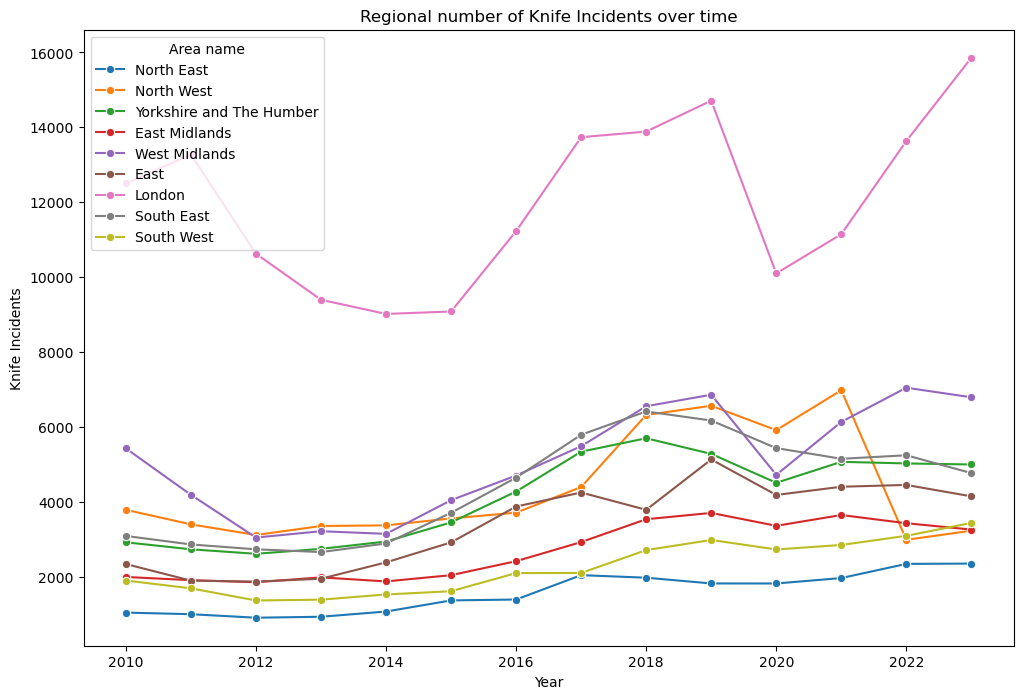

In [374]:
plt.figure(figsize=(12, 8))
TimeSeries_Knife = sns.lineplot(x="Year", y="Knife Incidents", hue="Area name", data=UK_Knife_Small_Long, marker="o").set_title("Regional number of Knife Incidents over time")
TimeSeries_Knife